In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import plotnine as plt9
from plotnine import *

from utils.visual import *

In [188]:
# df = make_plots_each_algorithm("../src/results/first_attempt_result_4_balancers.csv")
df = pd.read_csv("../src/results/performance_22_Apr_2024.csv")

df = df[df['Metric'].apply(lambda x: False if x.split("-")[1] in ['TP','TN','FP','FN','FalsePositiveRate','FalseNegativeRate'] else True)]
df['Score'] = round(df['Score'],2)
df['Set'] = df['Metric'].apply(lambda x: x.split("-")[0])
df['MainMetric'] = df['Metric'].apply(lambda x: x.split("-")[1] if x not in ["Train-F-1","Test-F-1"] else "F-1")

algoritms = df.Algorithm.unique()
imputers = df.Imputer.unique()
imbalance = df.Imbalance.unique()
metricss = df.Metric


In [189]:
df.groupby('Algorithm')['Algorithm'].count()

Algorithm
DecisionTree          80
KNN                   80
LogisticRegression    80
NaiveBayes            80
SVM                   80
Name: Algorithm, dtype: int64

In [190]:
algoritms_title = {"LogisticRegression":"Performance of Logistic Regression for each impution and data balancing approach",
                  "DecisionTree":"Performance of Decision Tree for each impution and data balancing approach",
                  "NaiveBayes":"Performance of Naive Bayes for each impution and data balancing approach",
                  "KNN":"Performance of KNN for each impution and data balancing approach",
                  "SVM":"Performance of SVM for each impution and data balancing approach"}

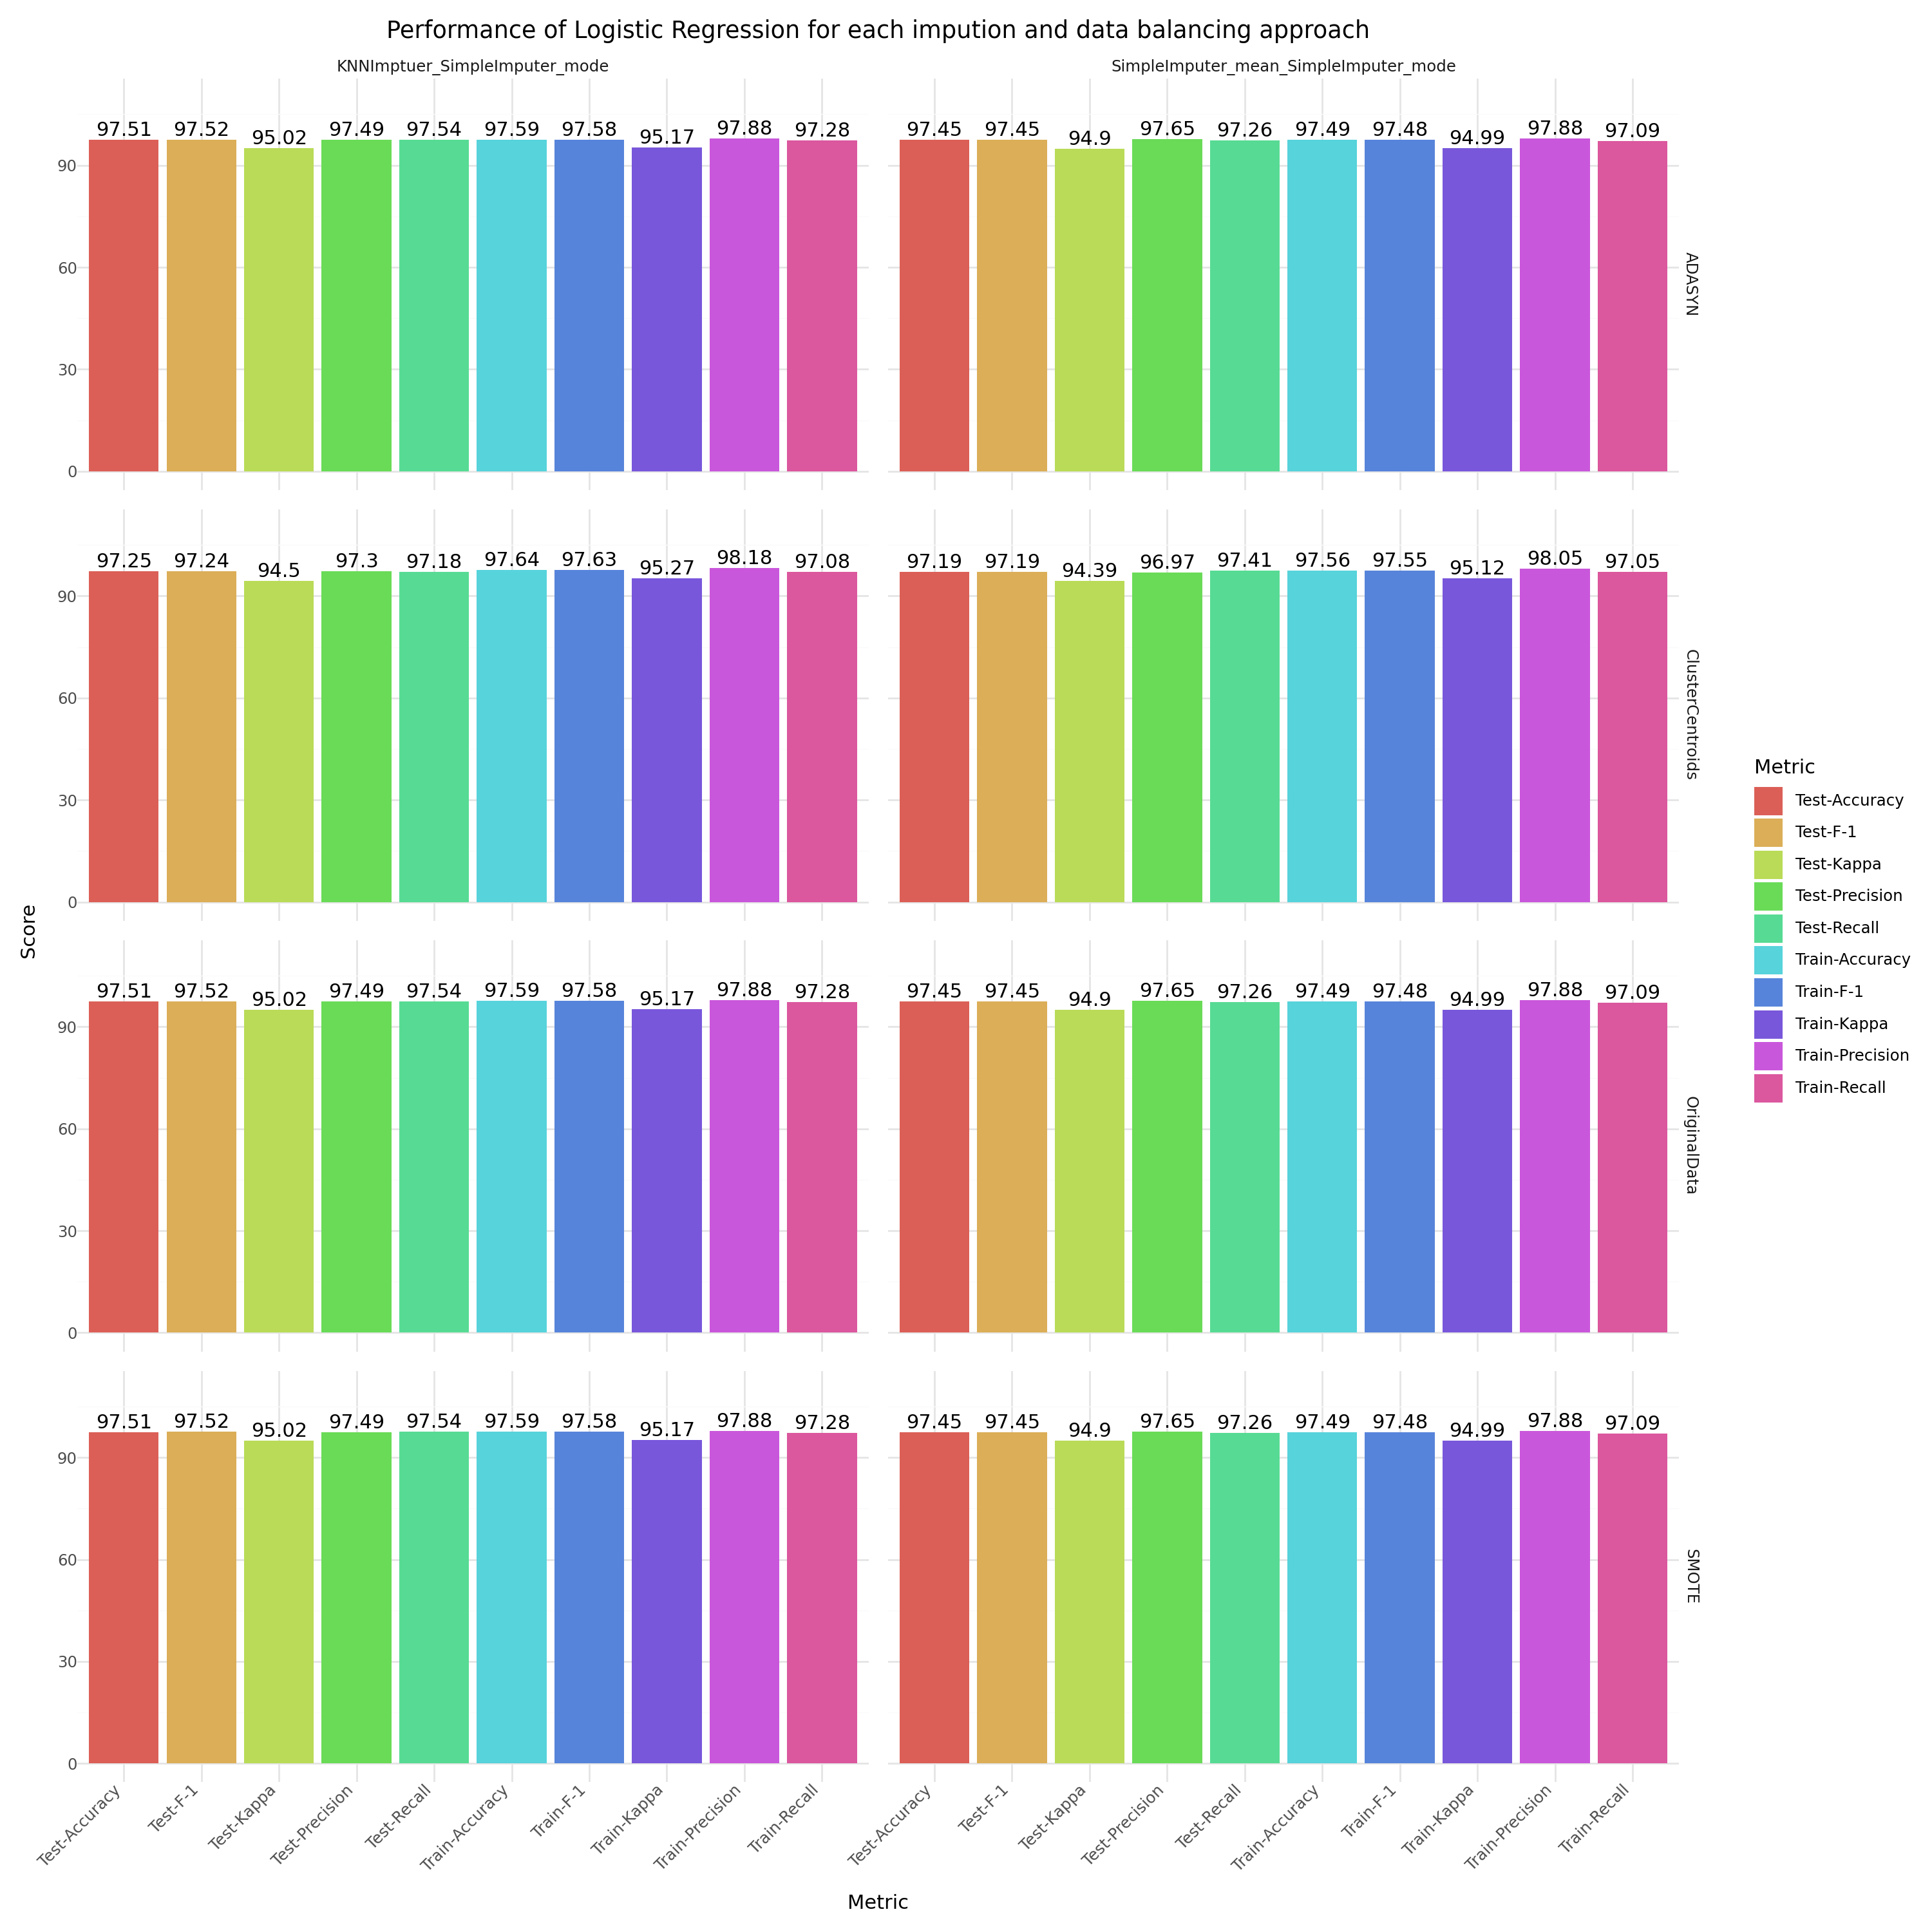

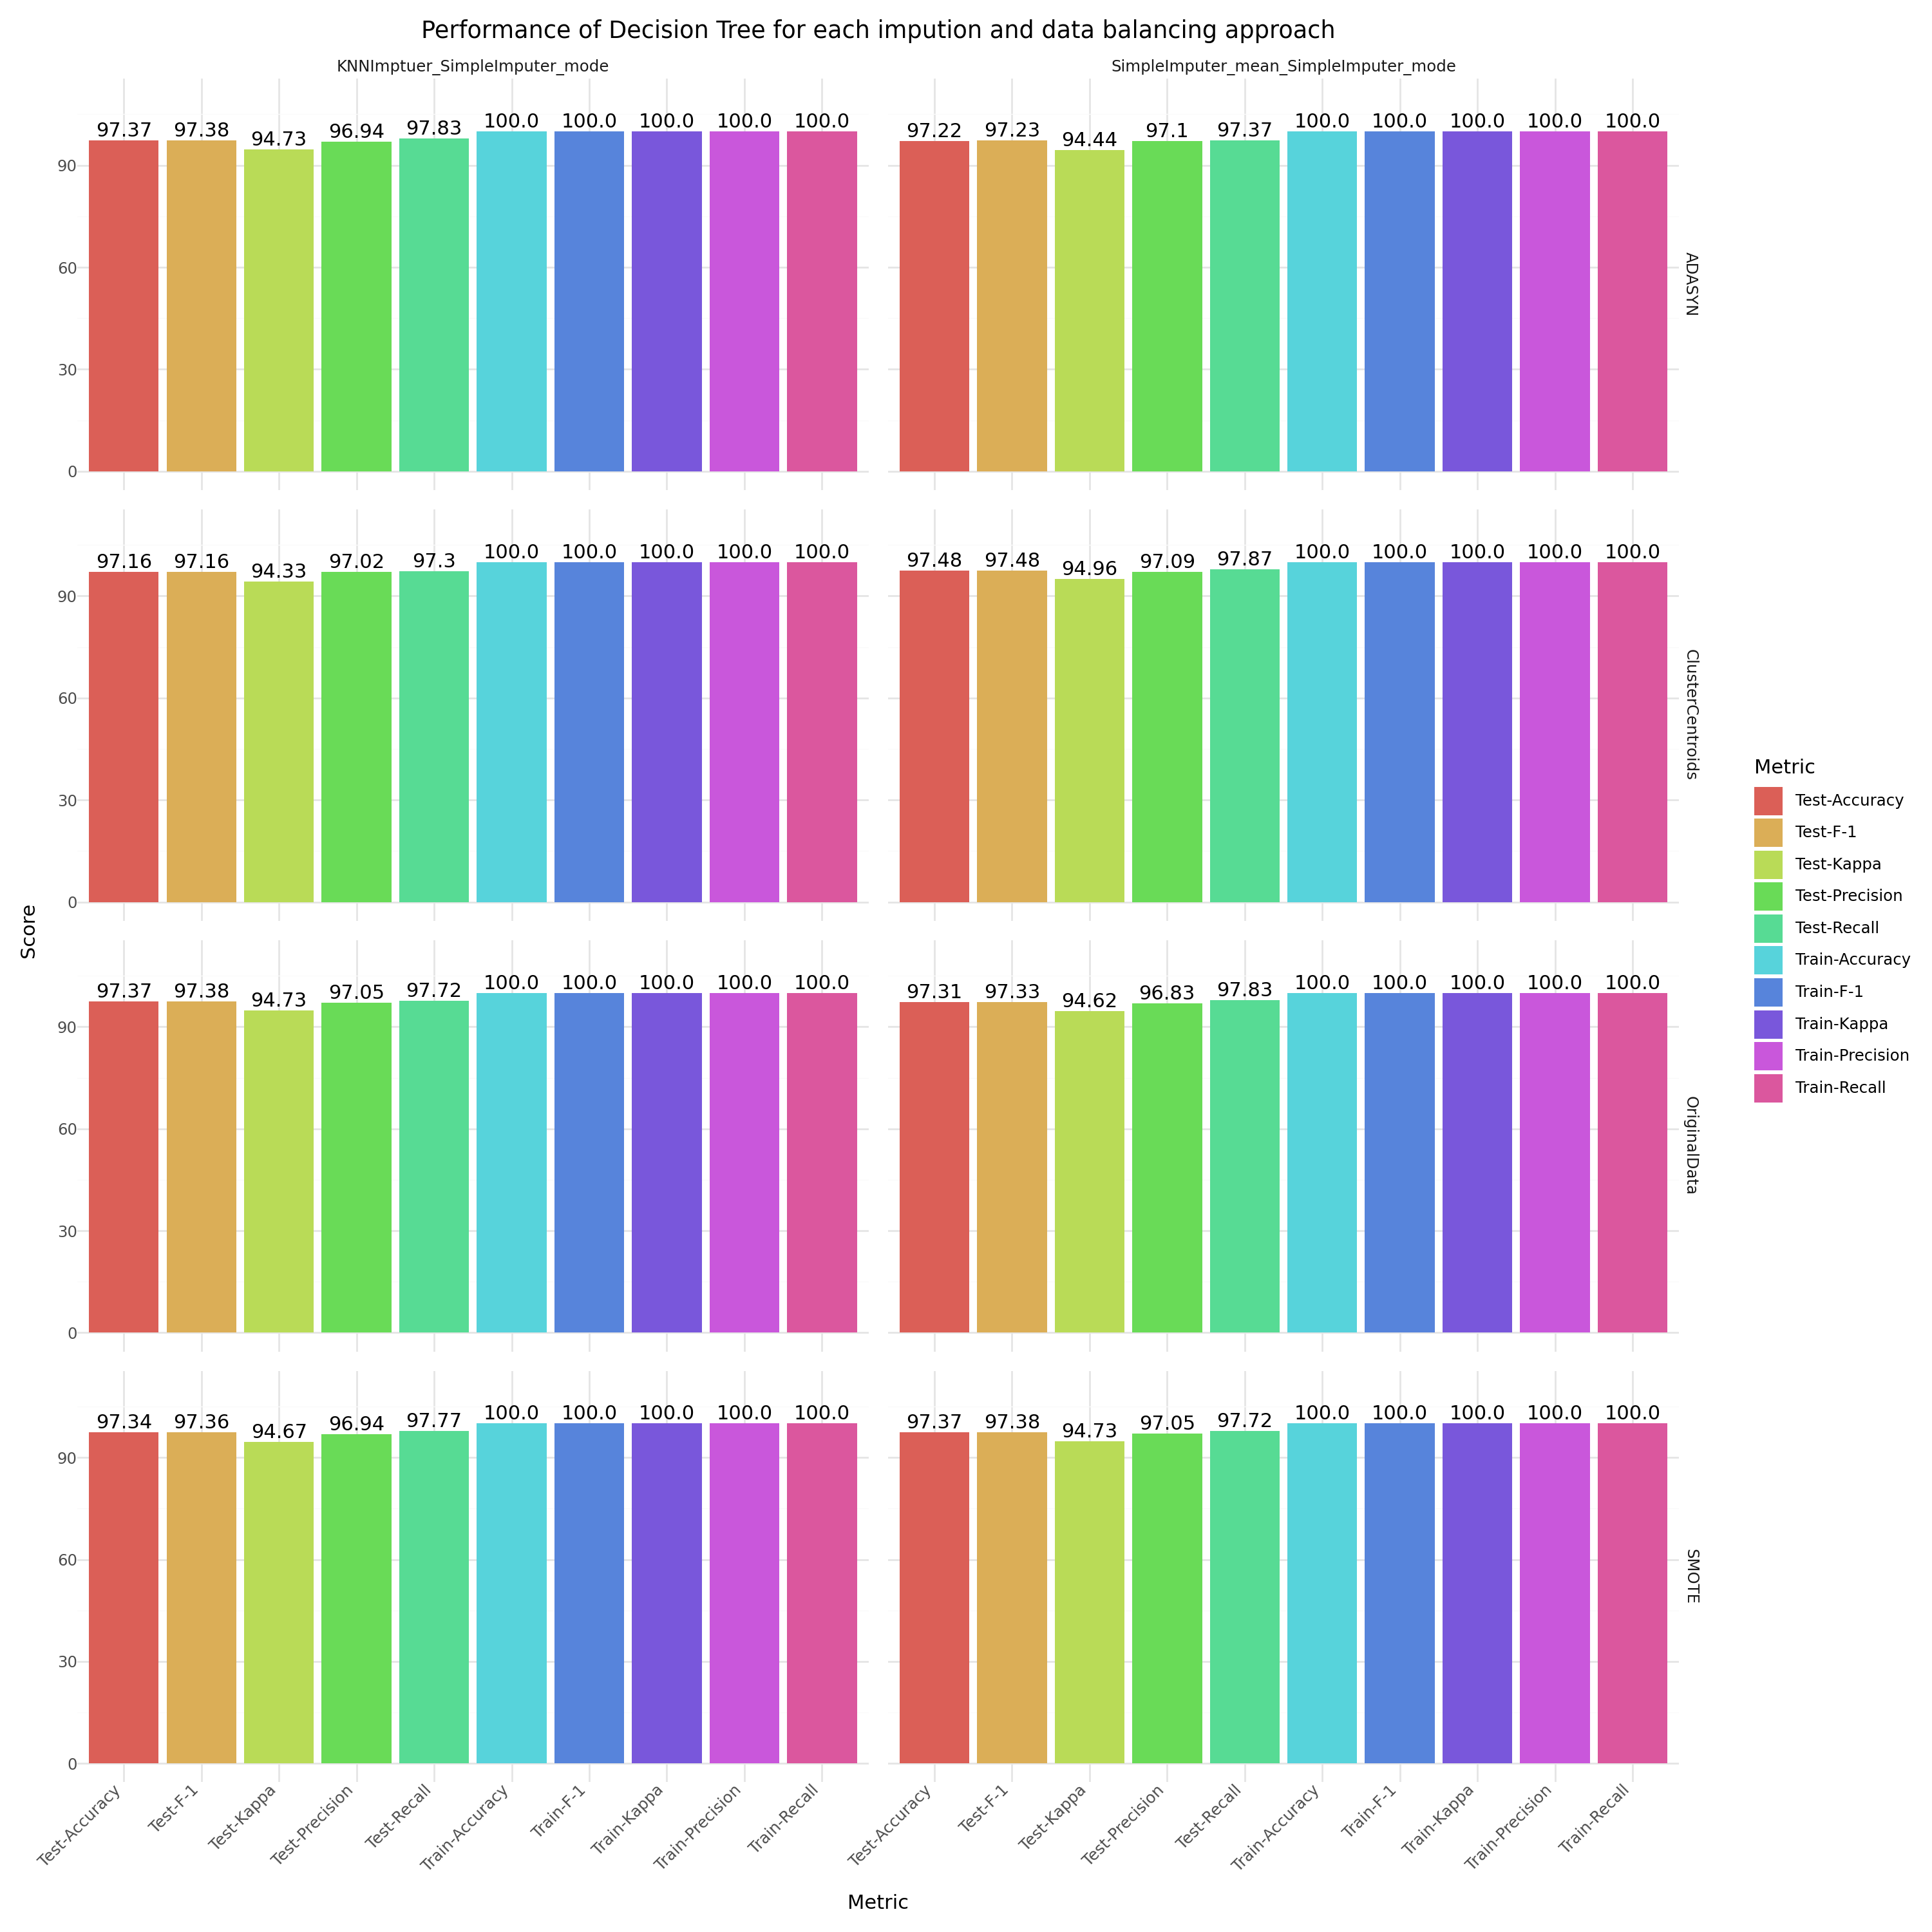

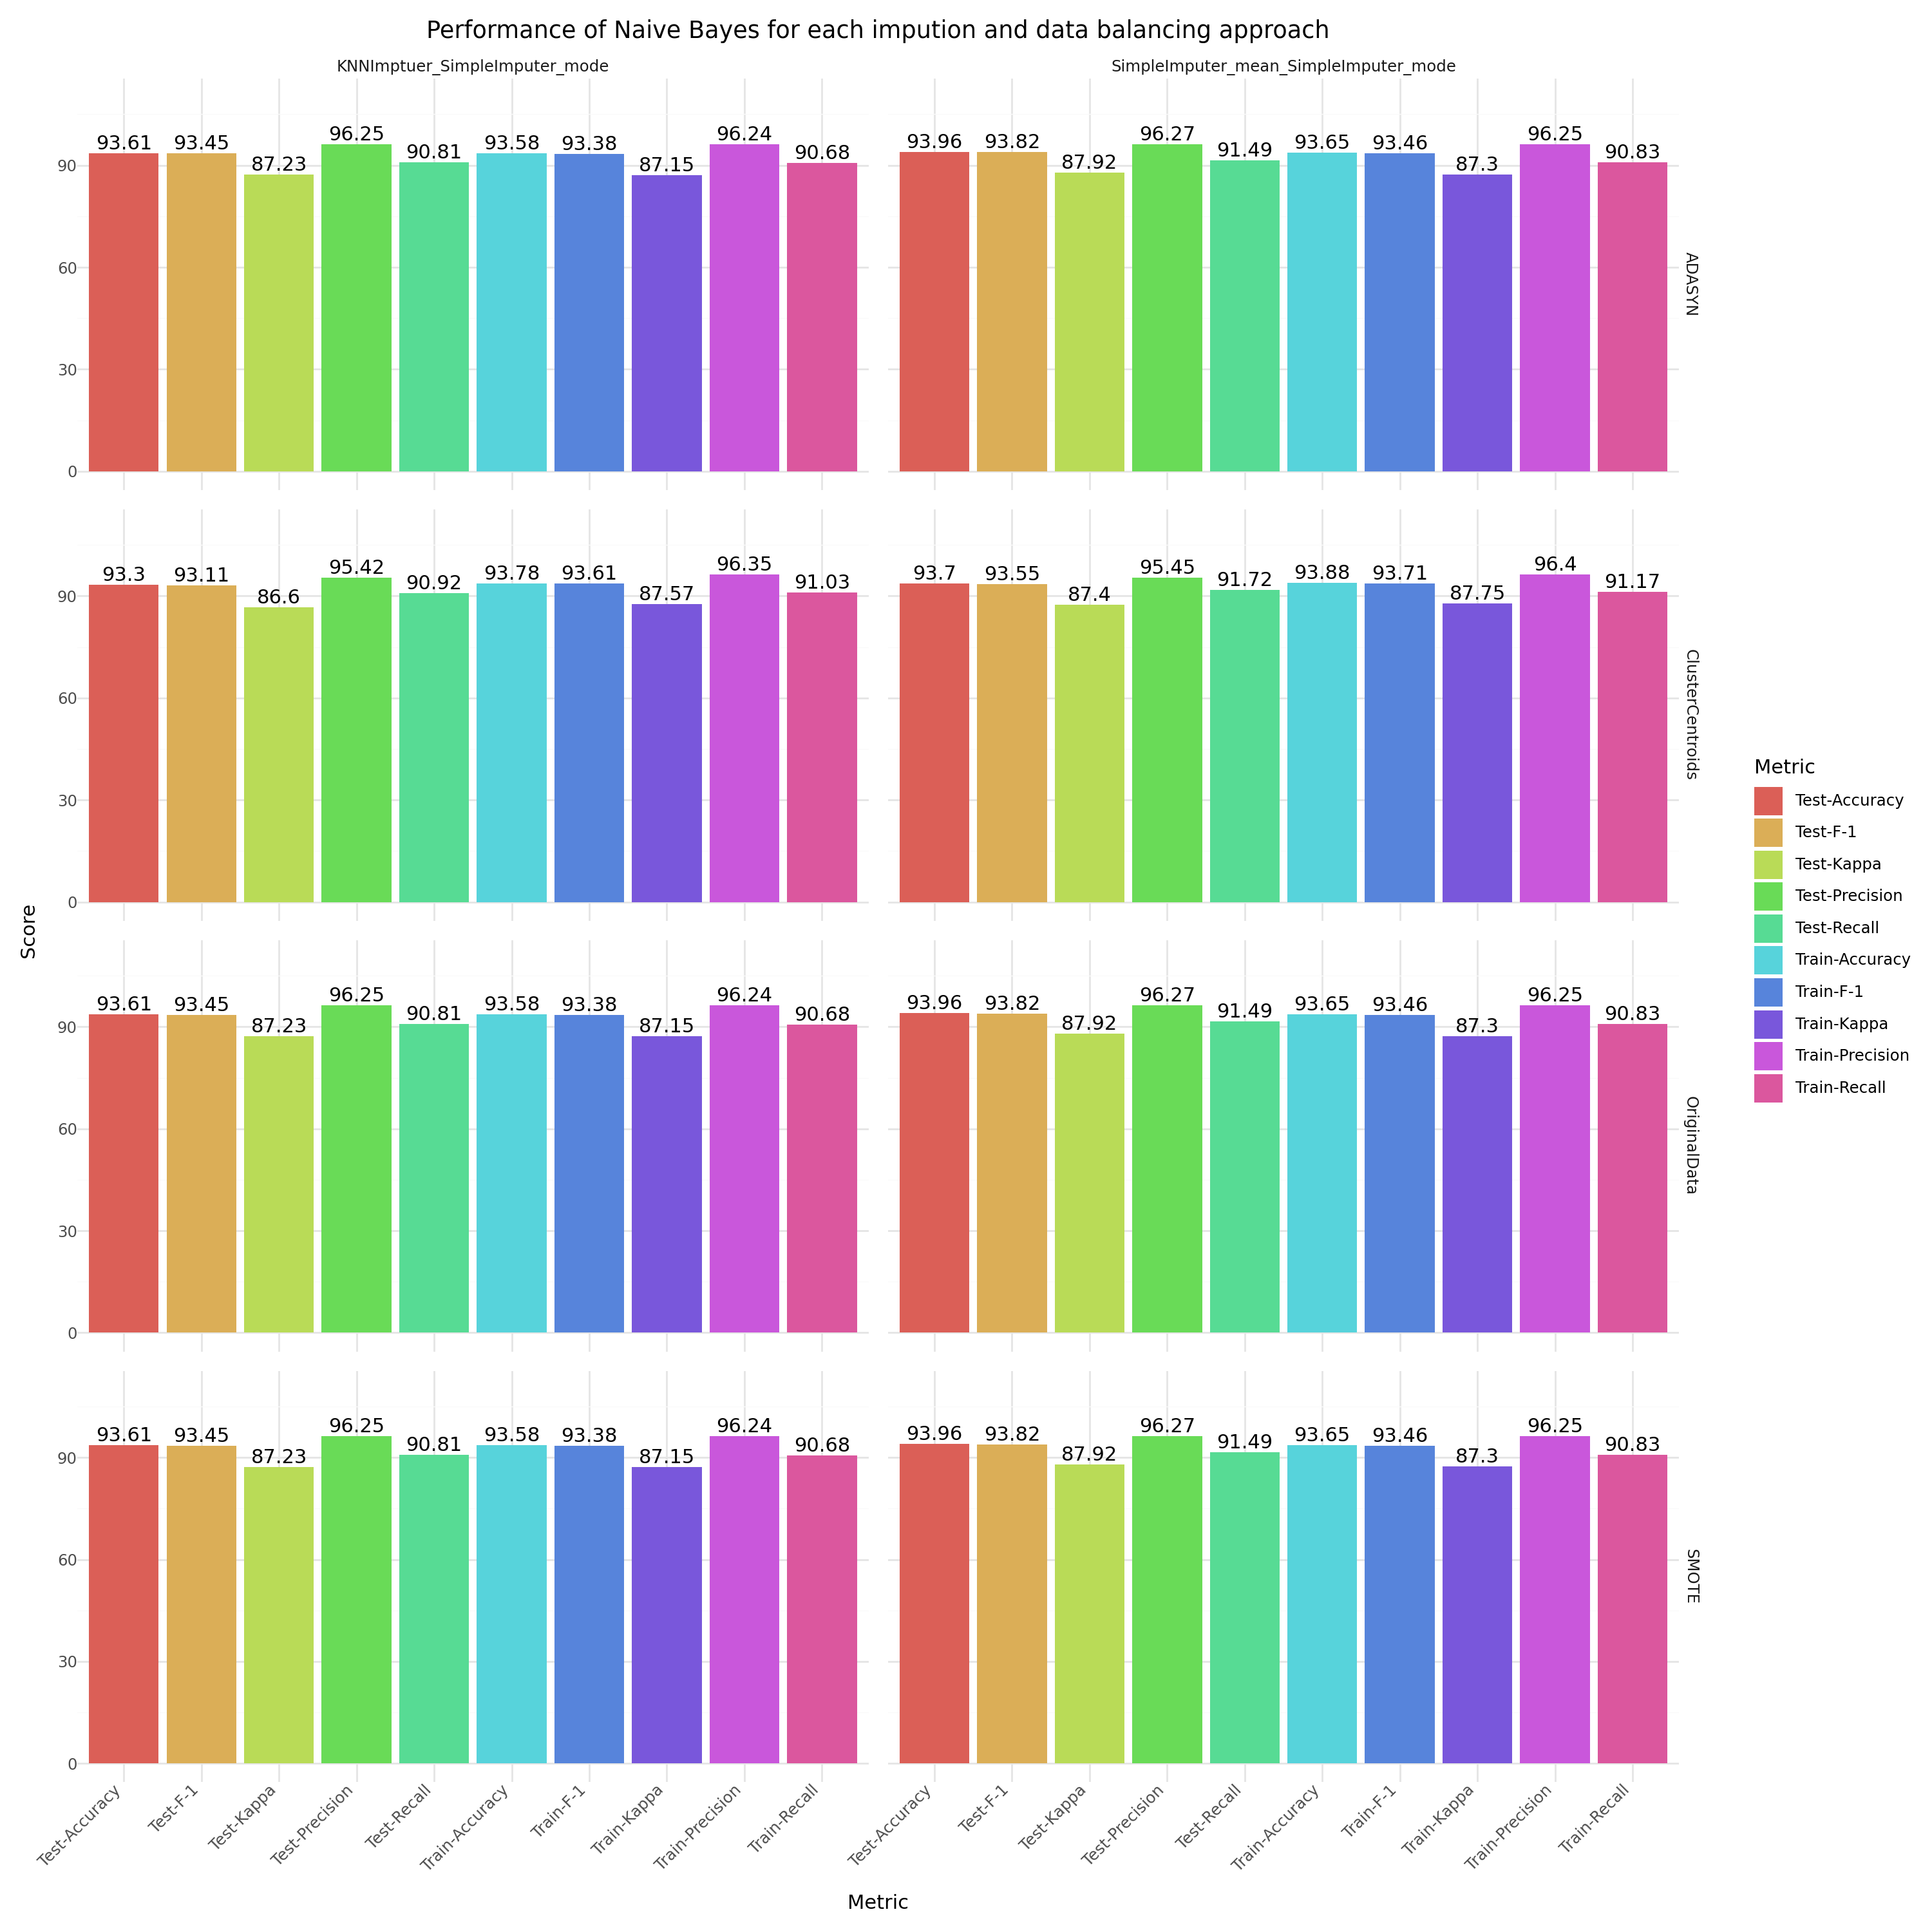

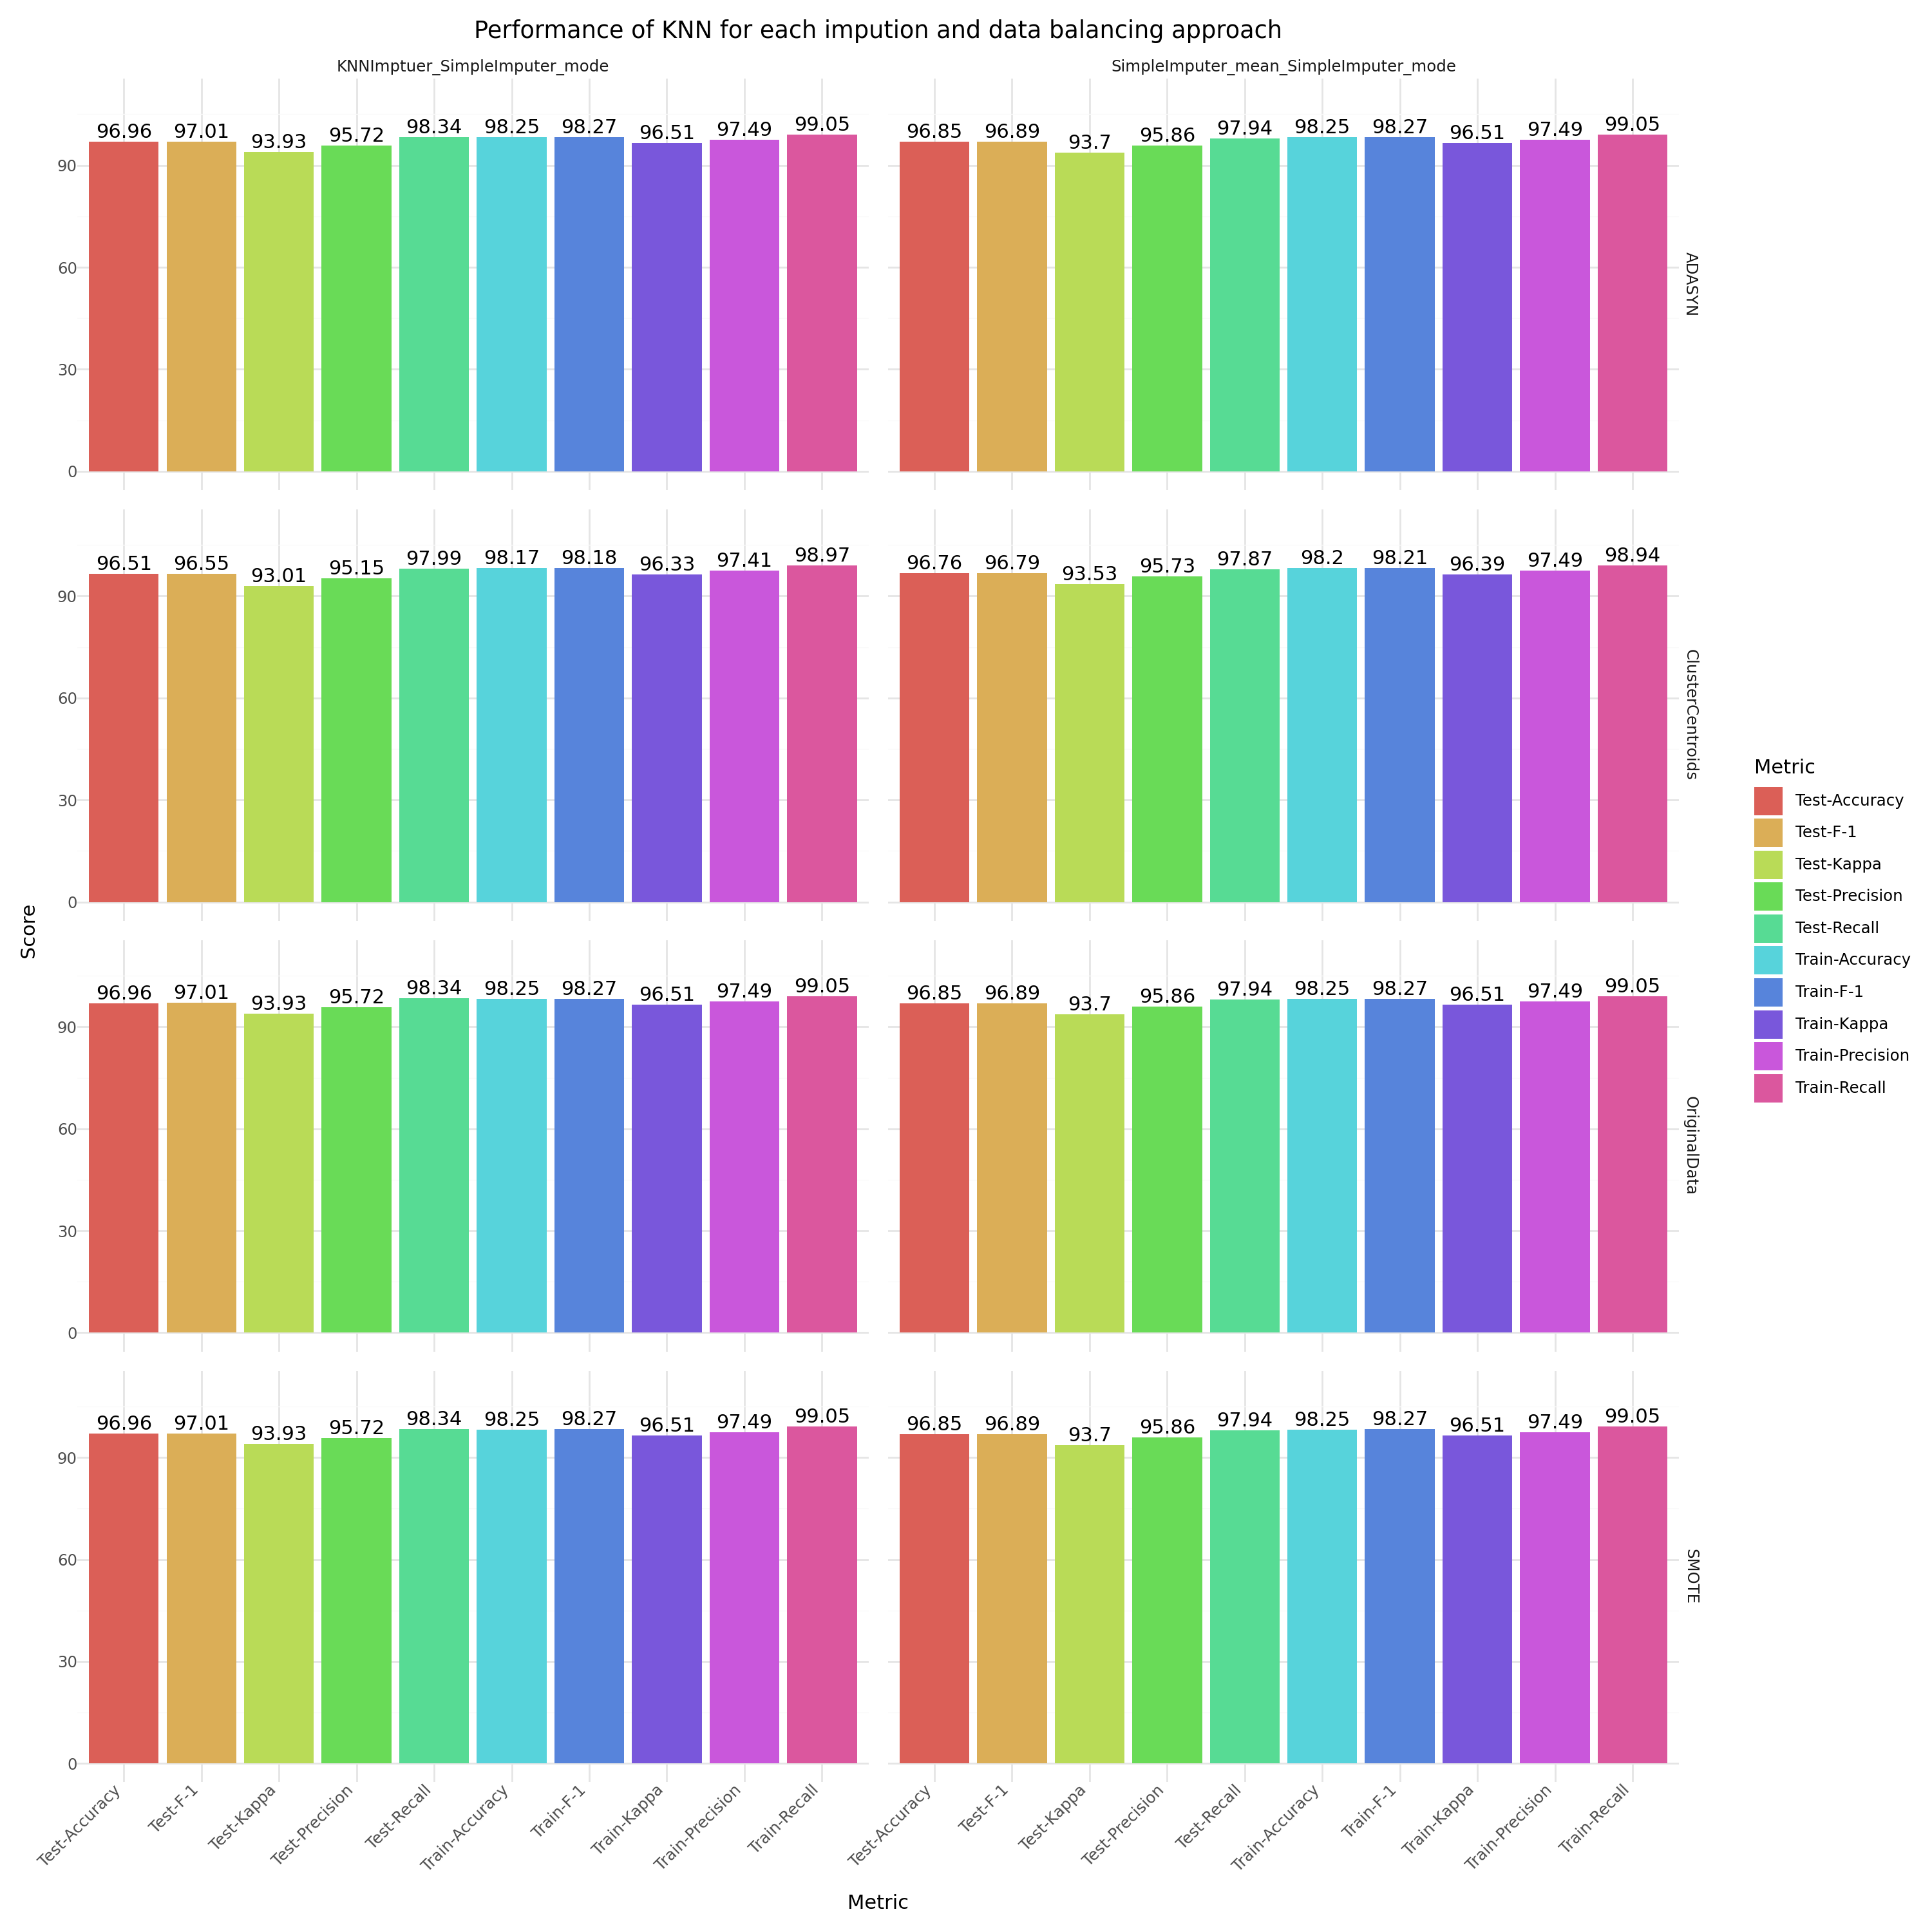

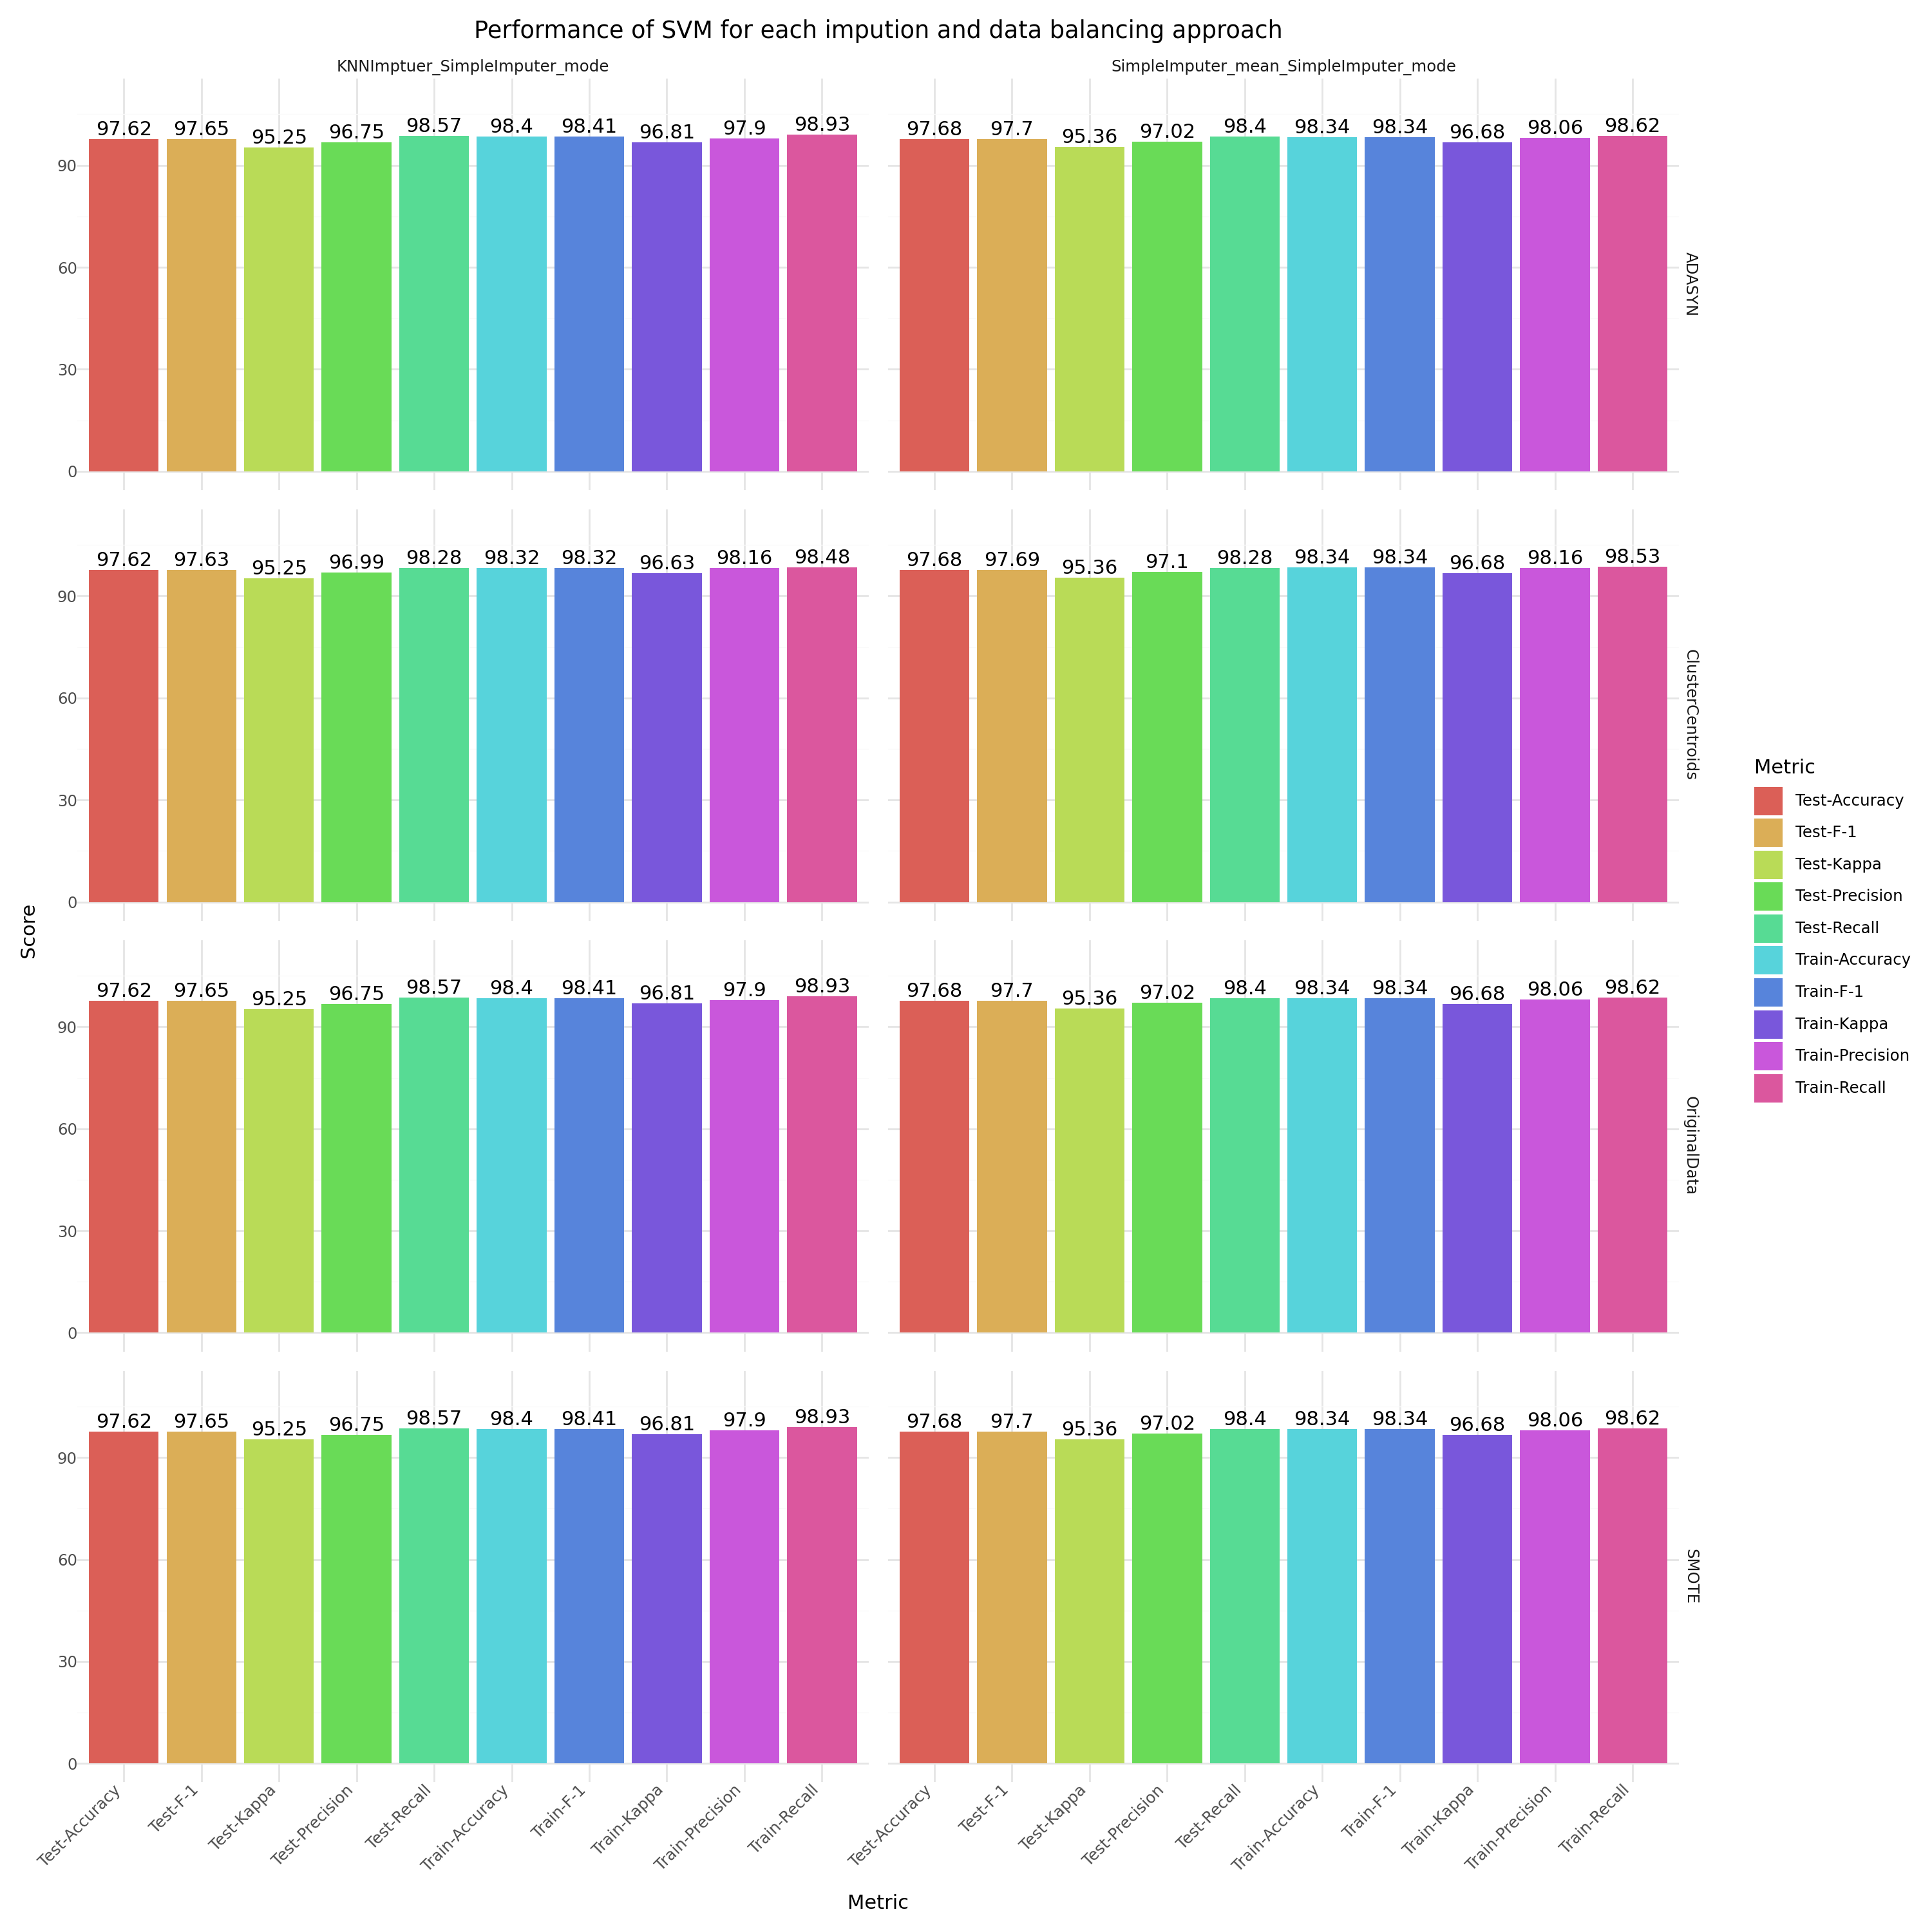

In [194]:
plot_for_each_algorithm(df)

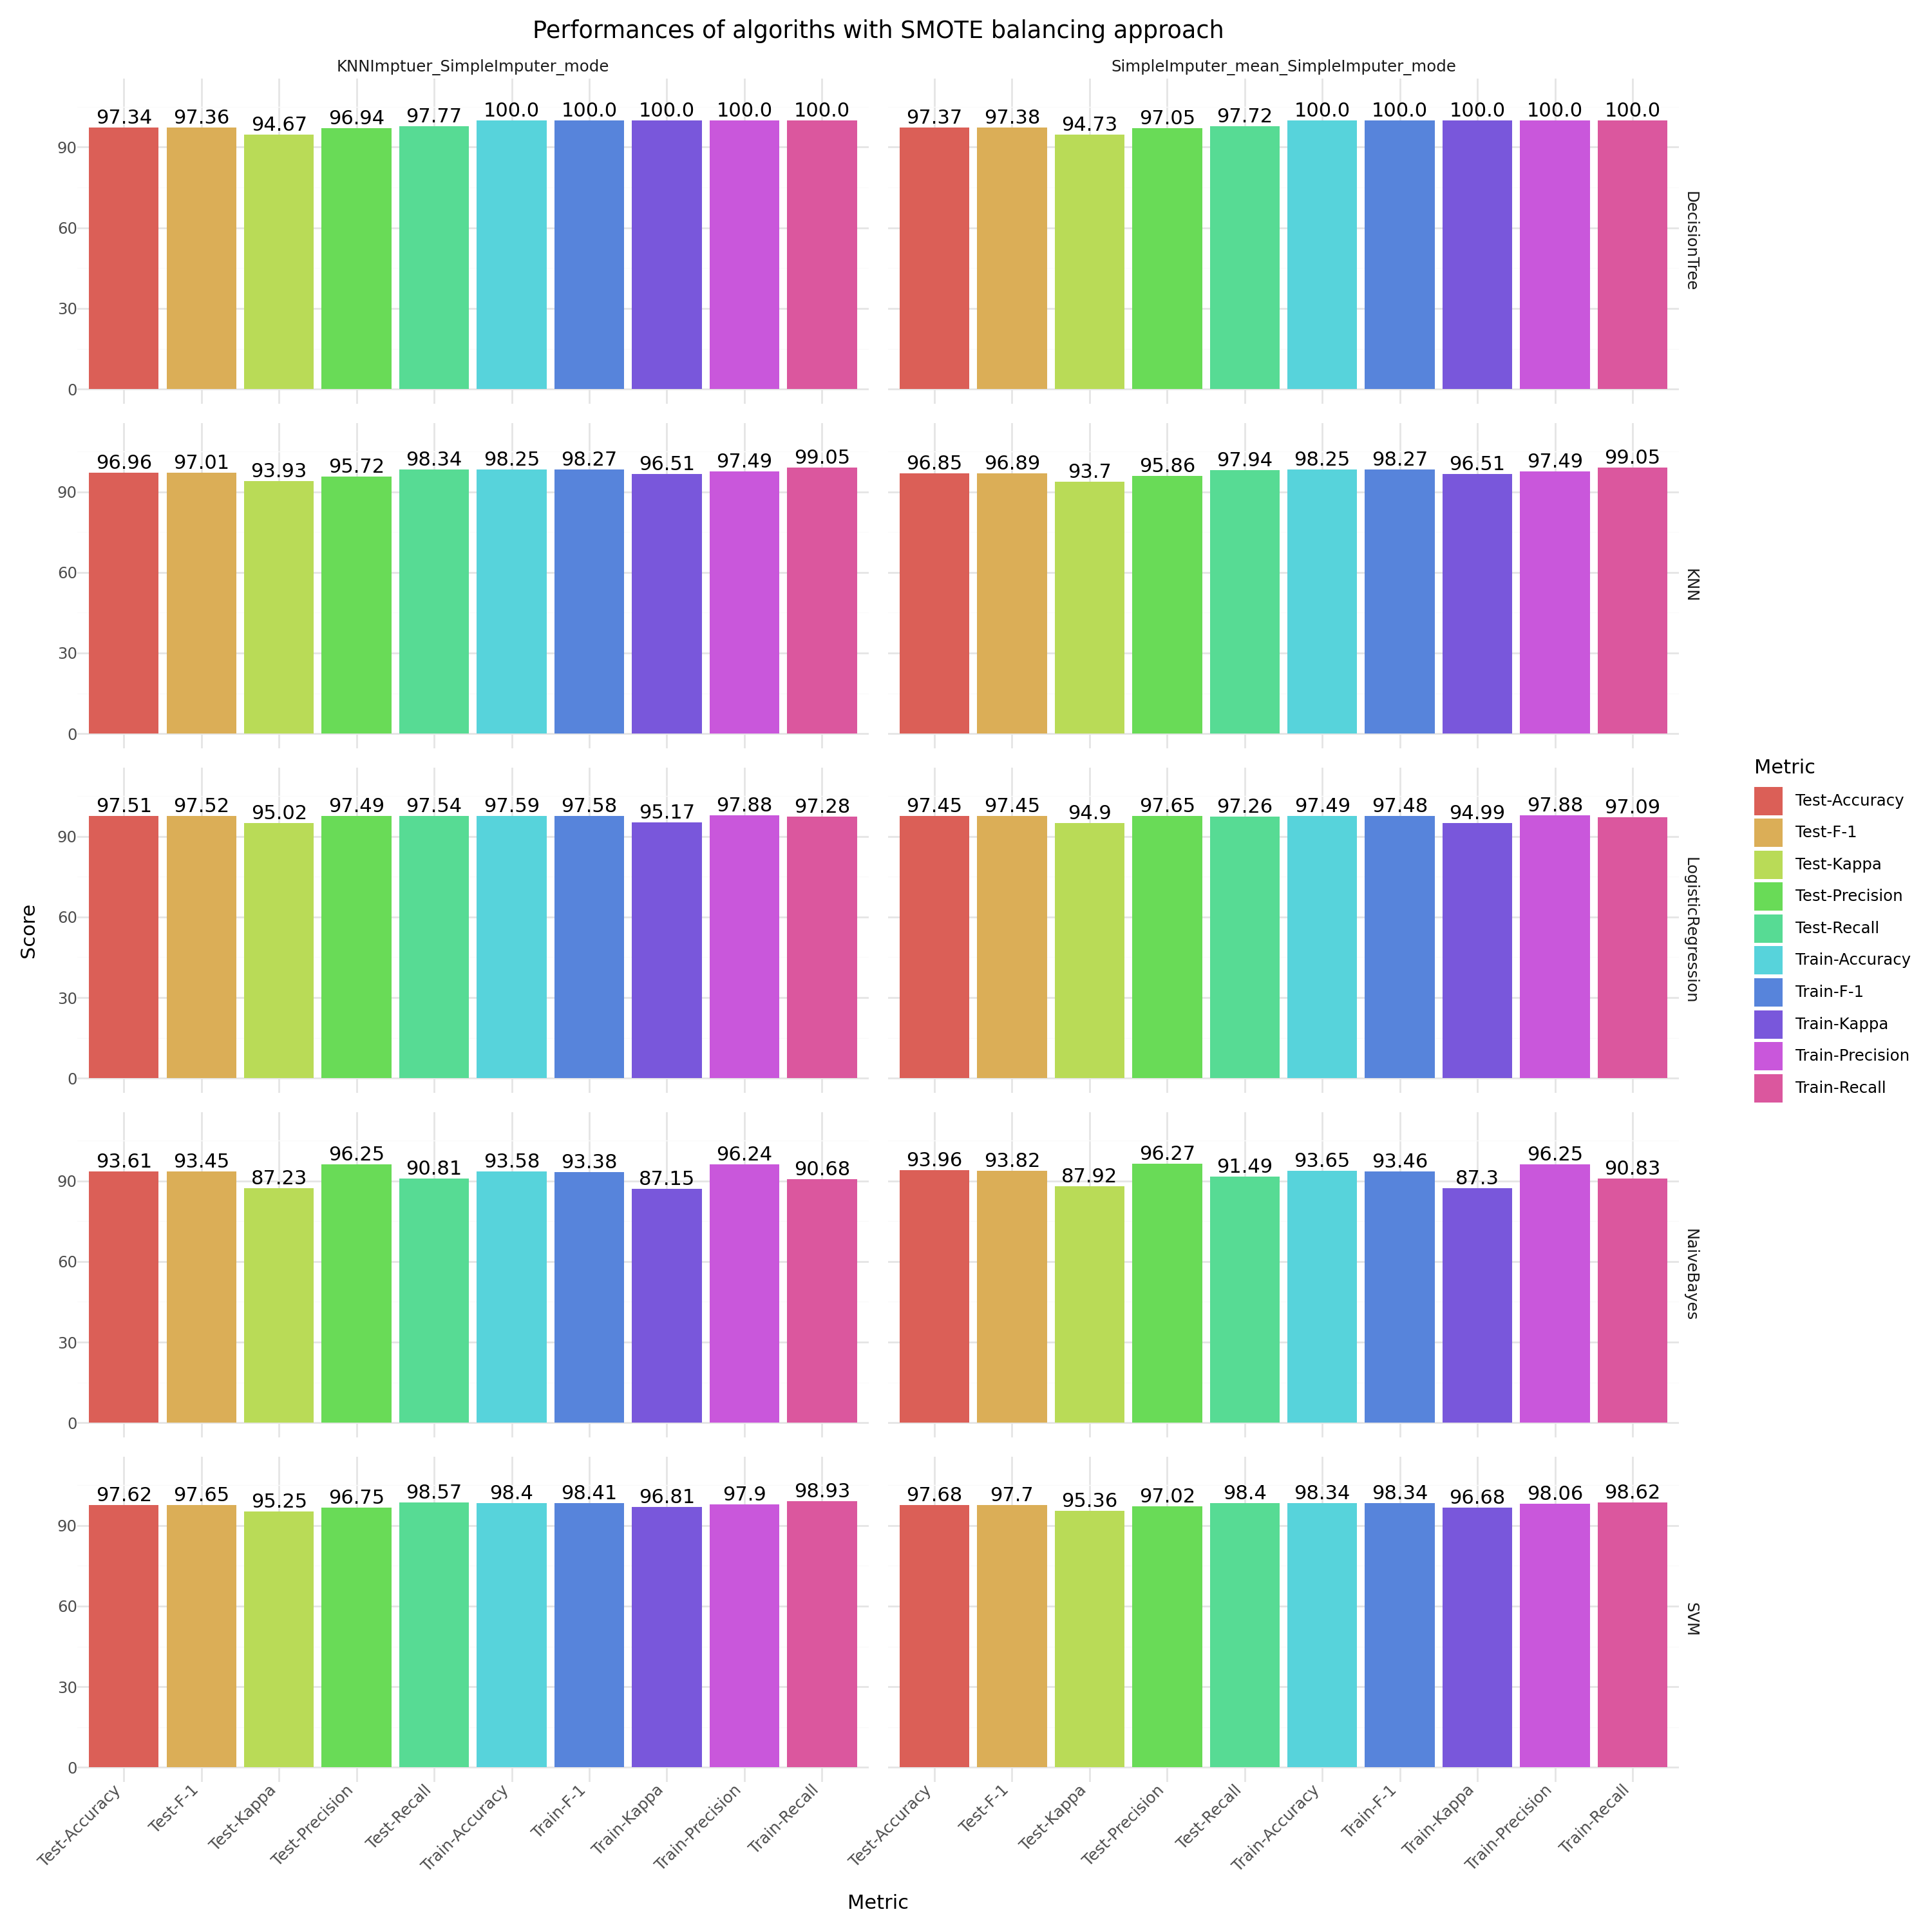

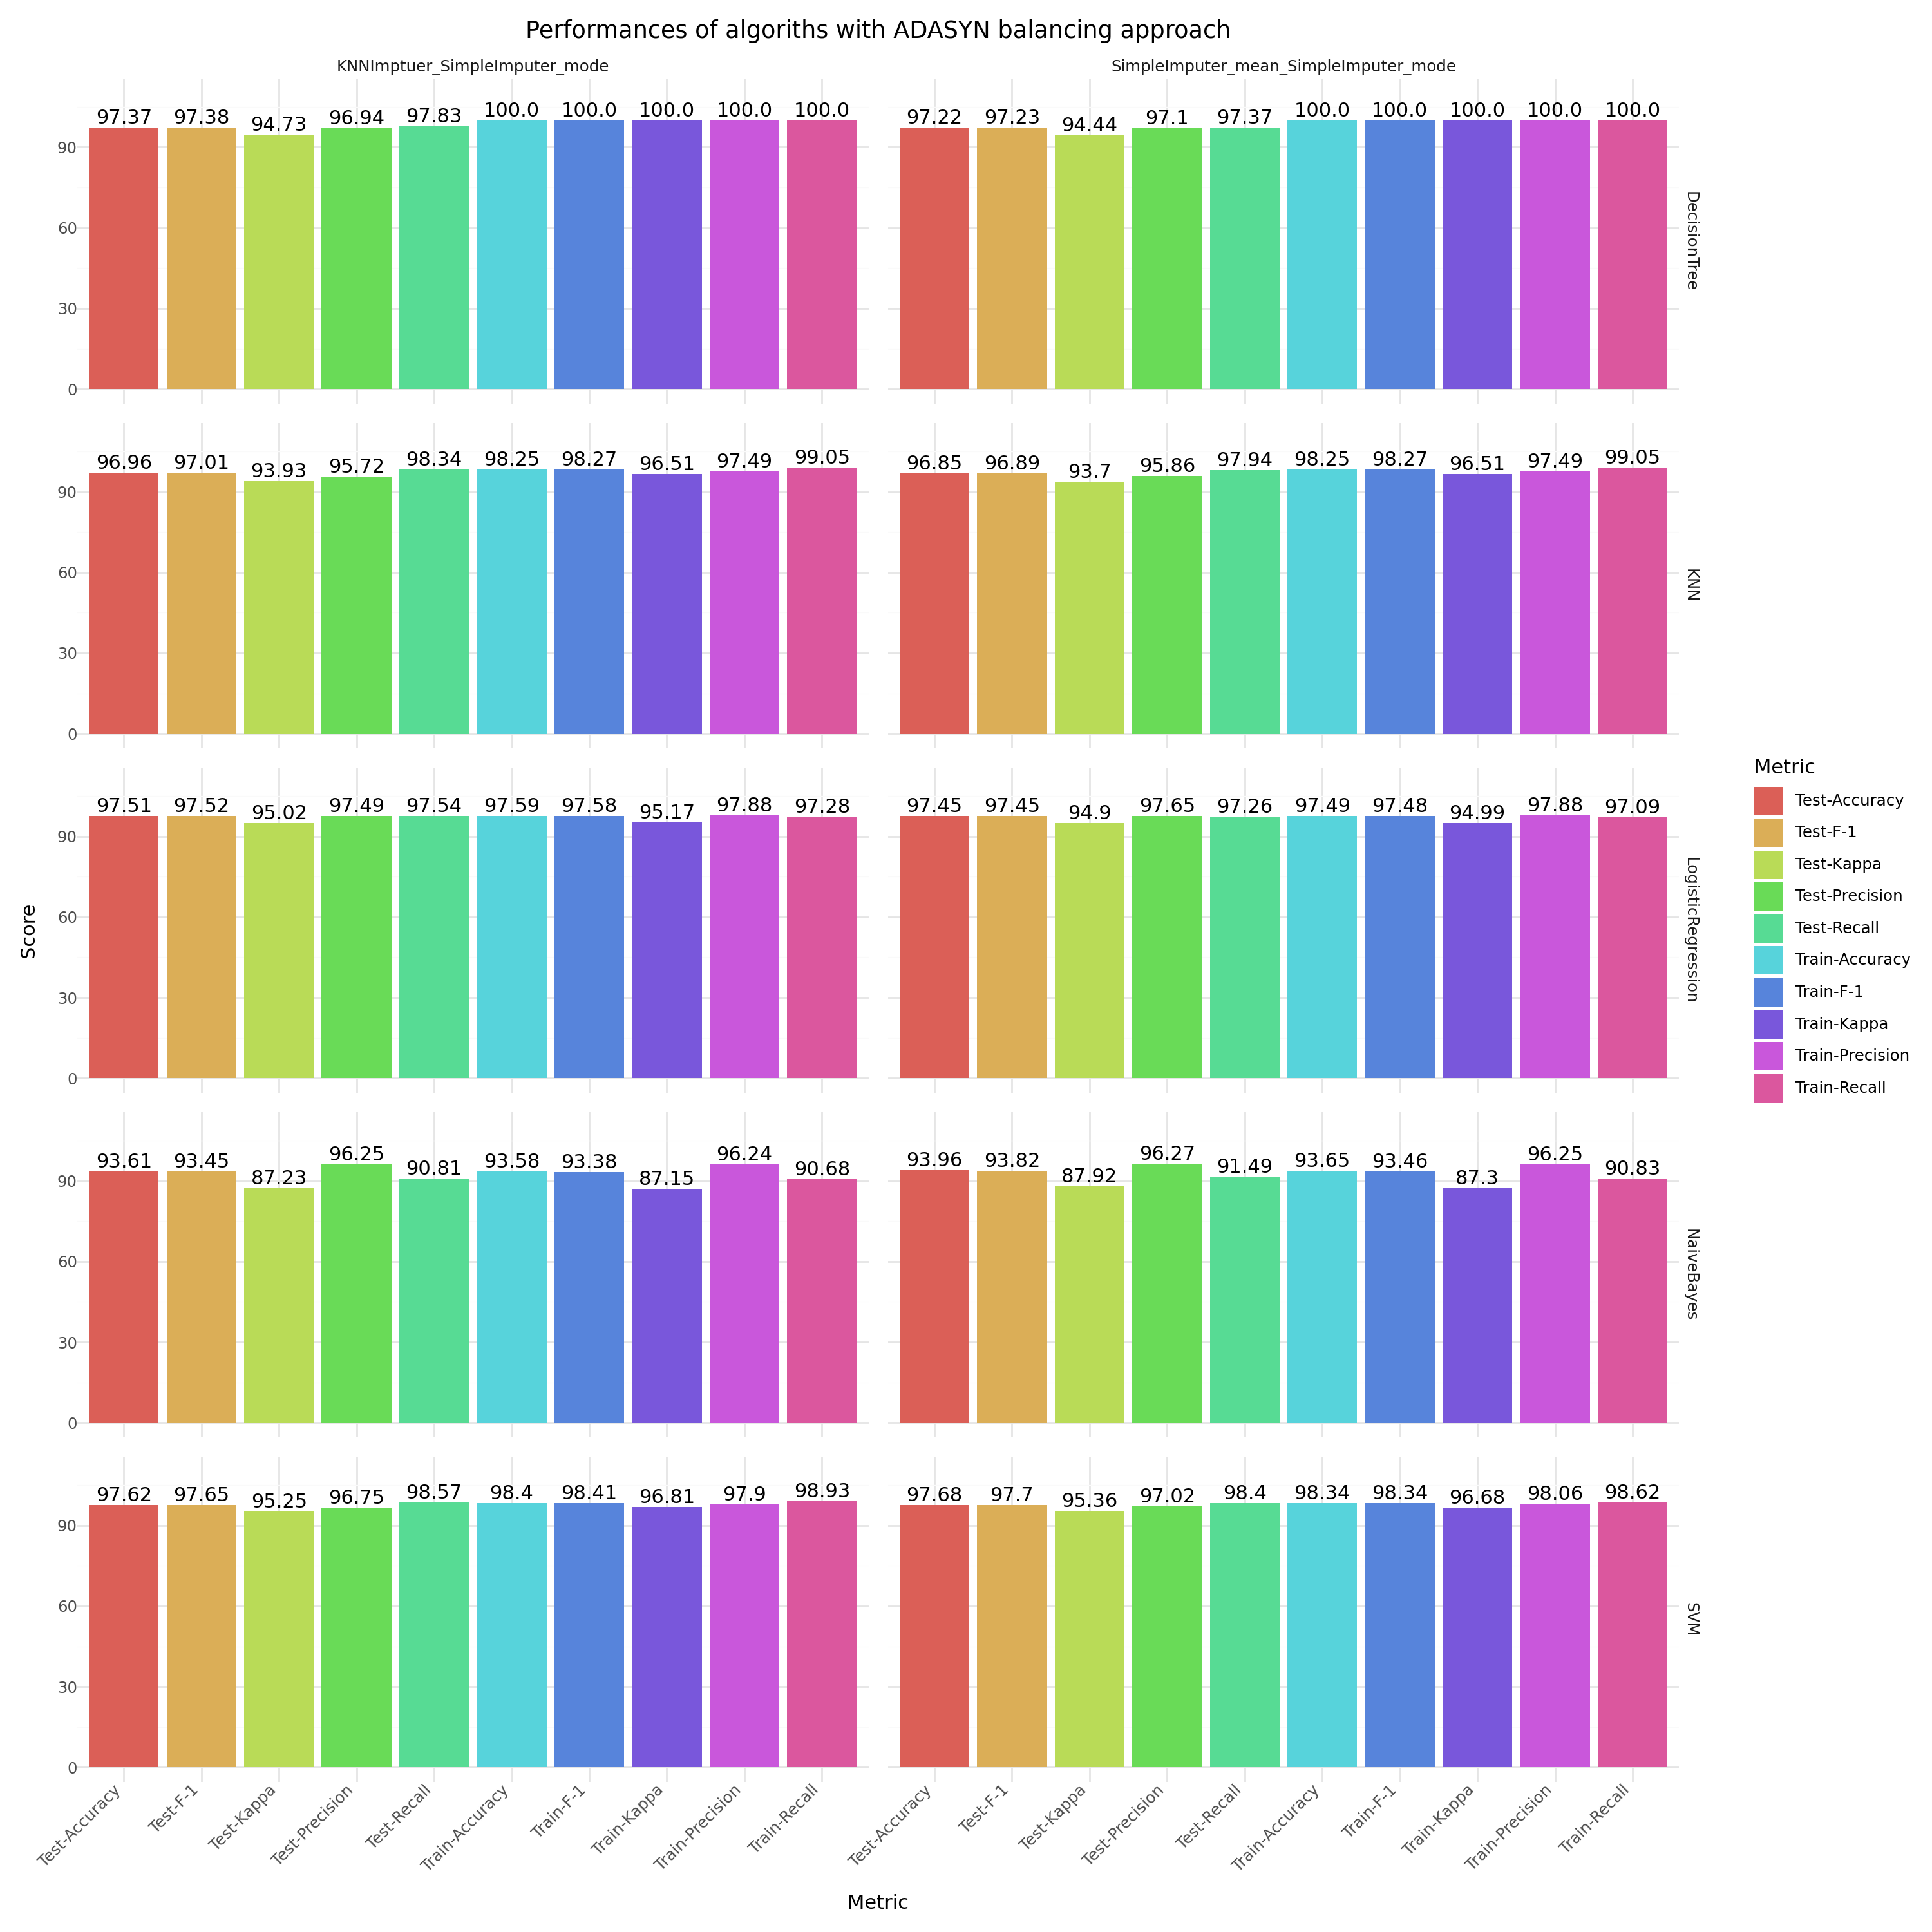

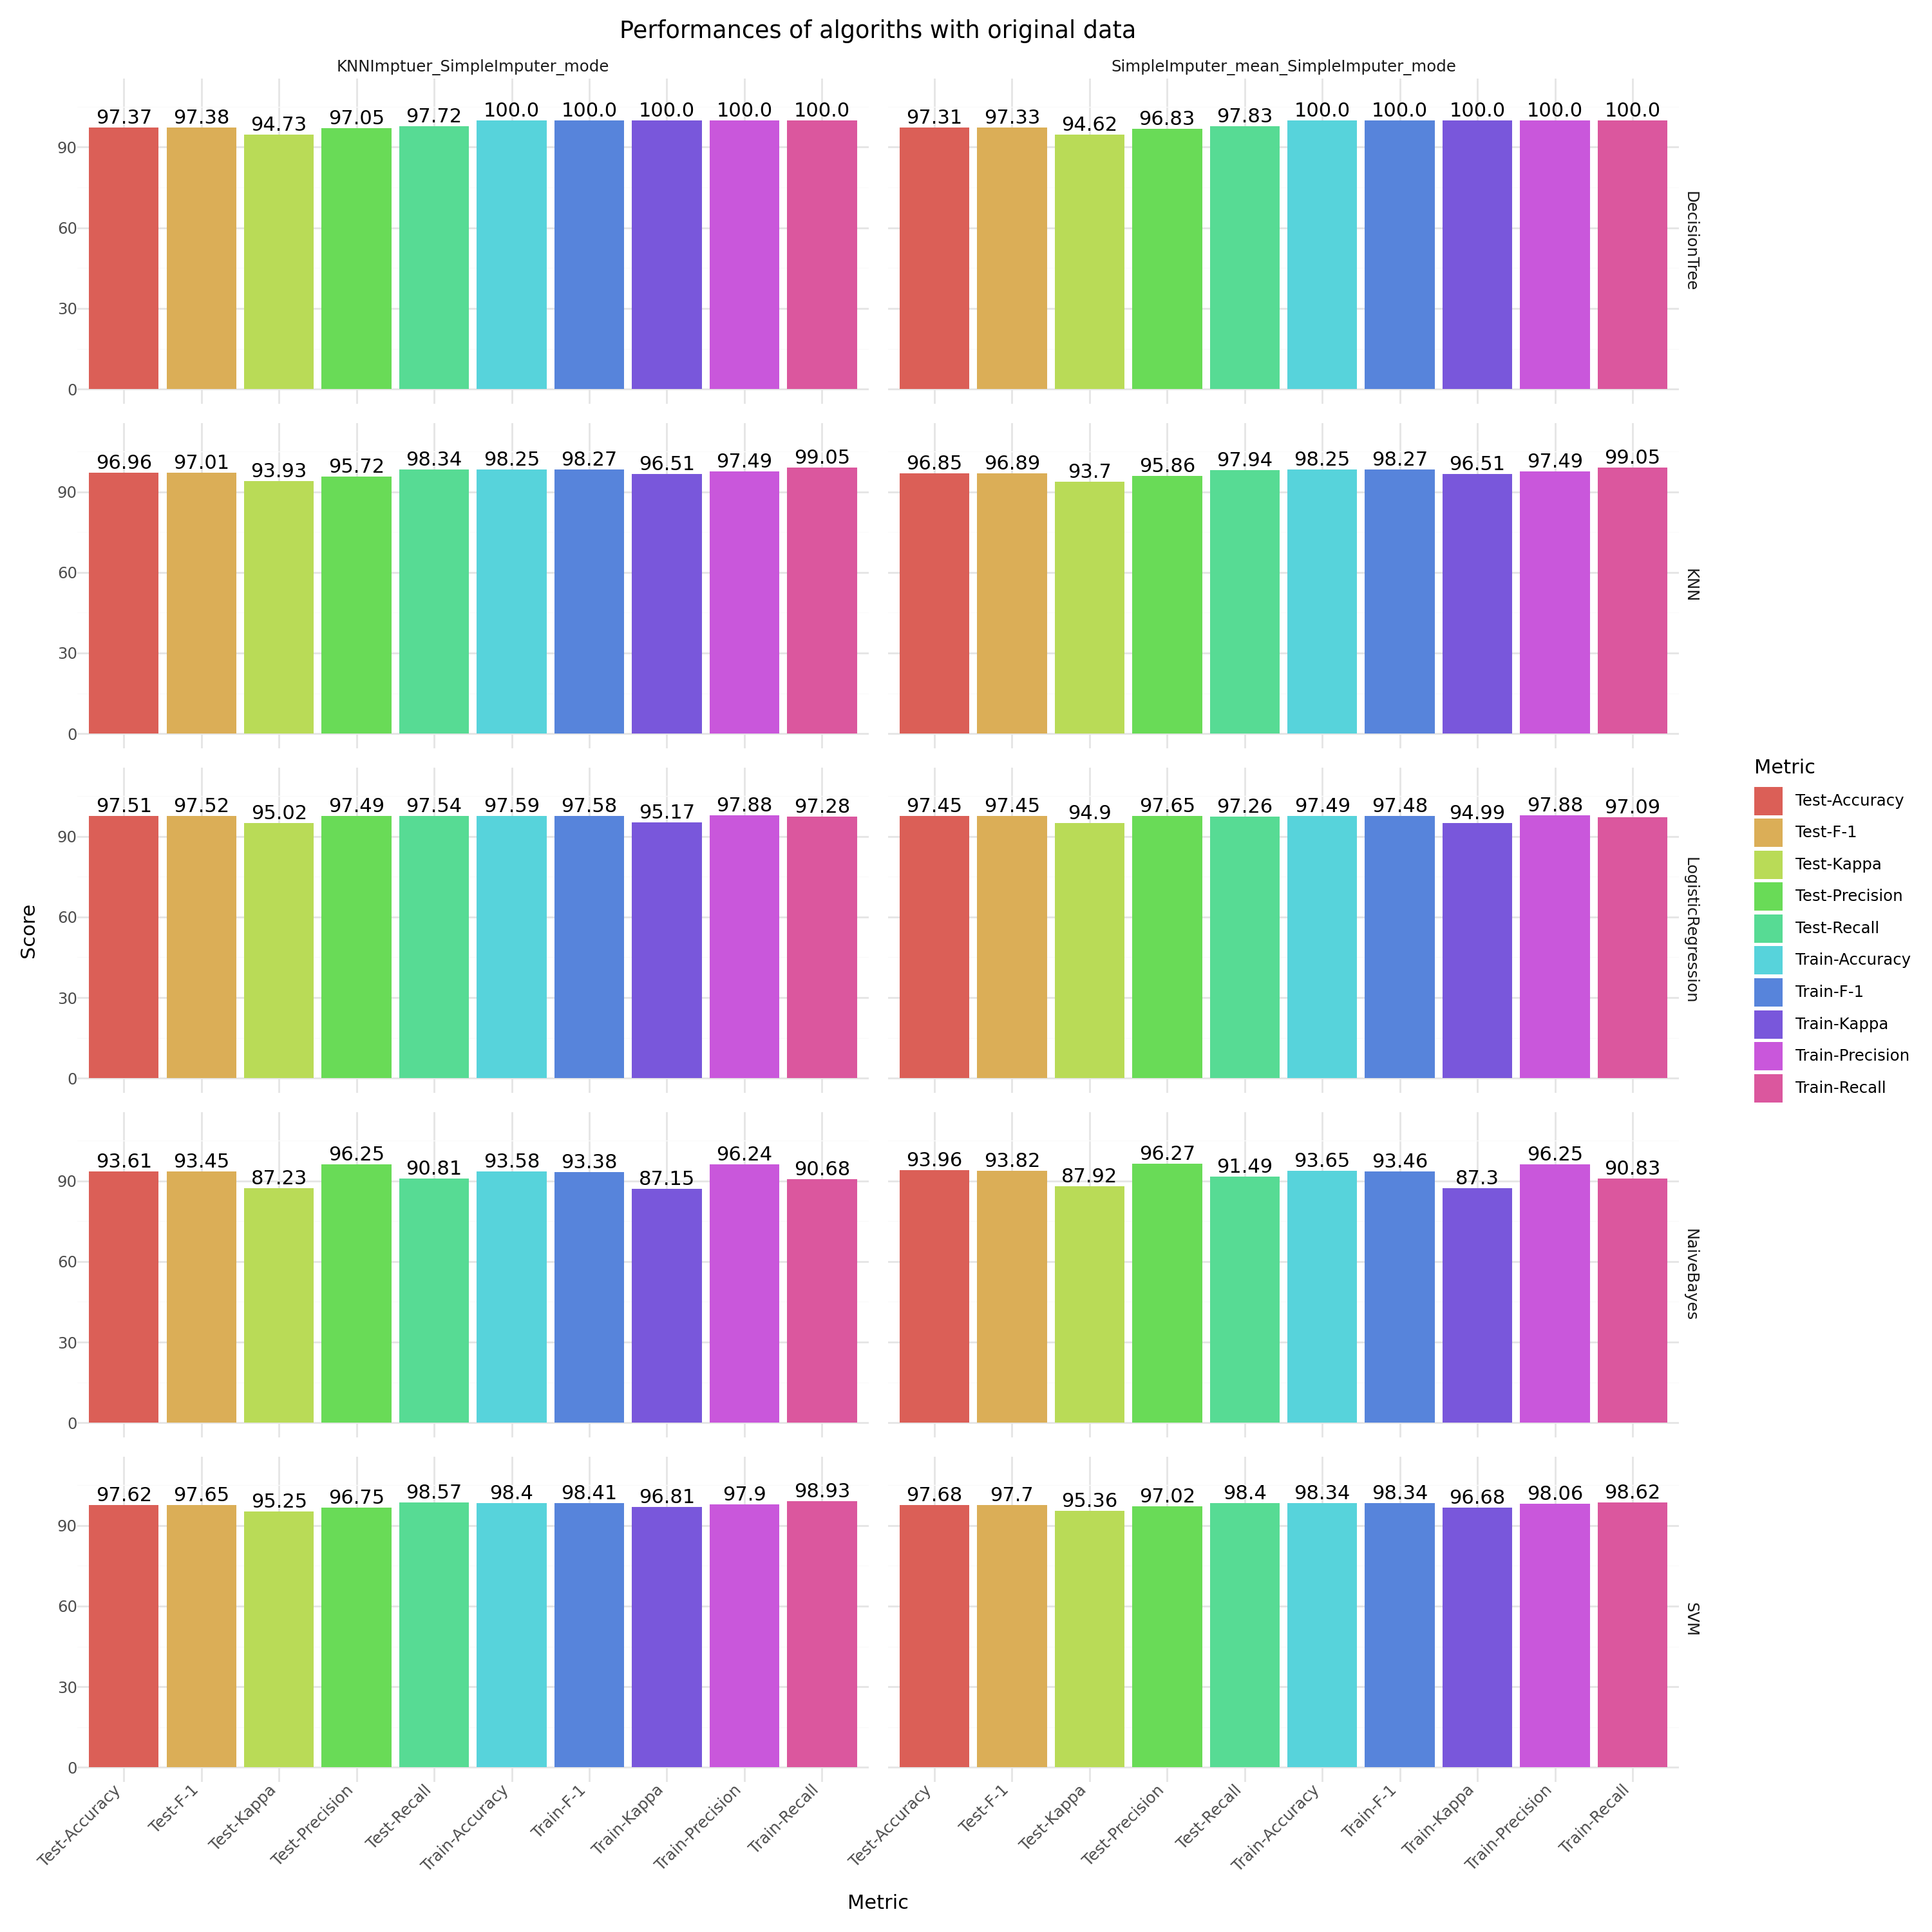

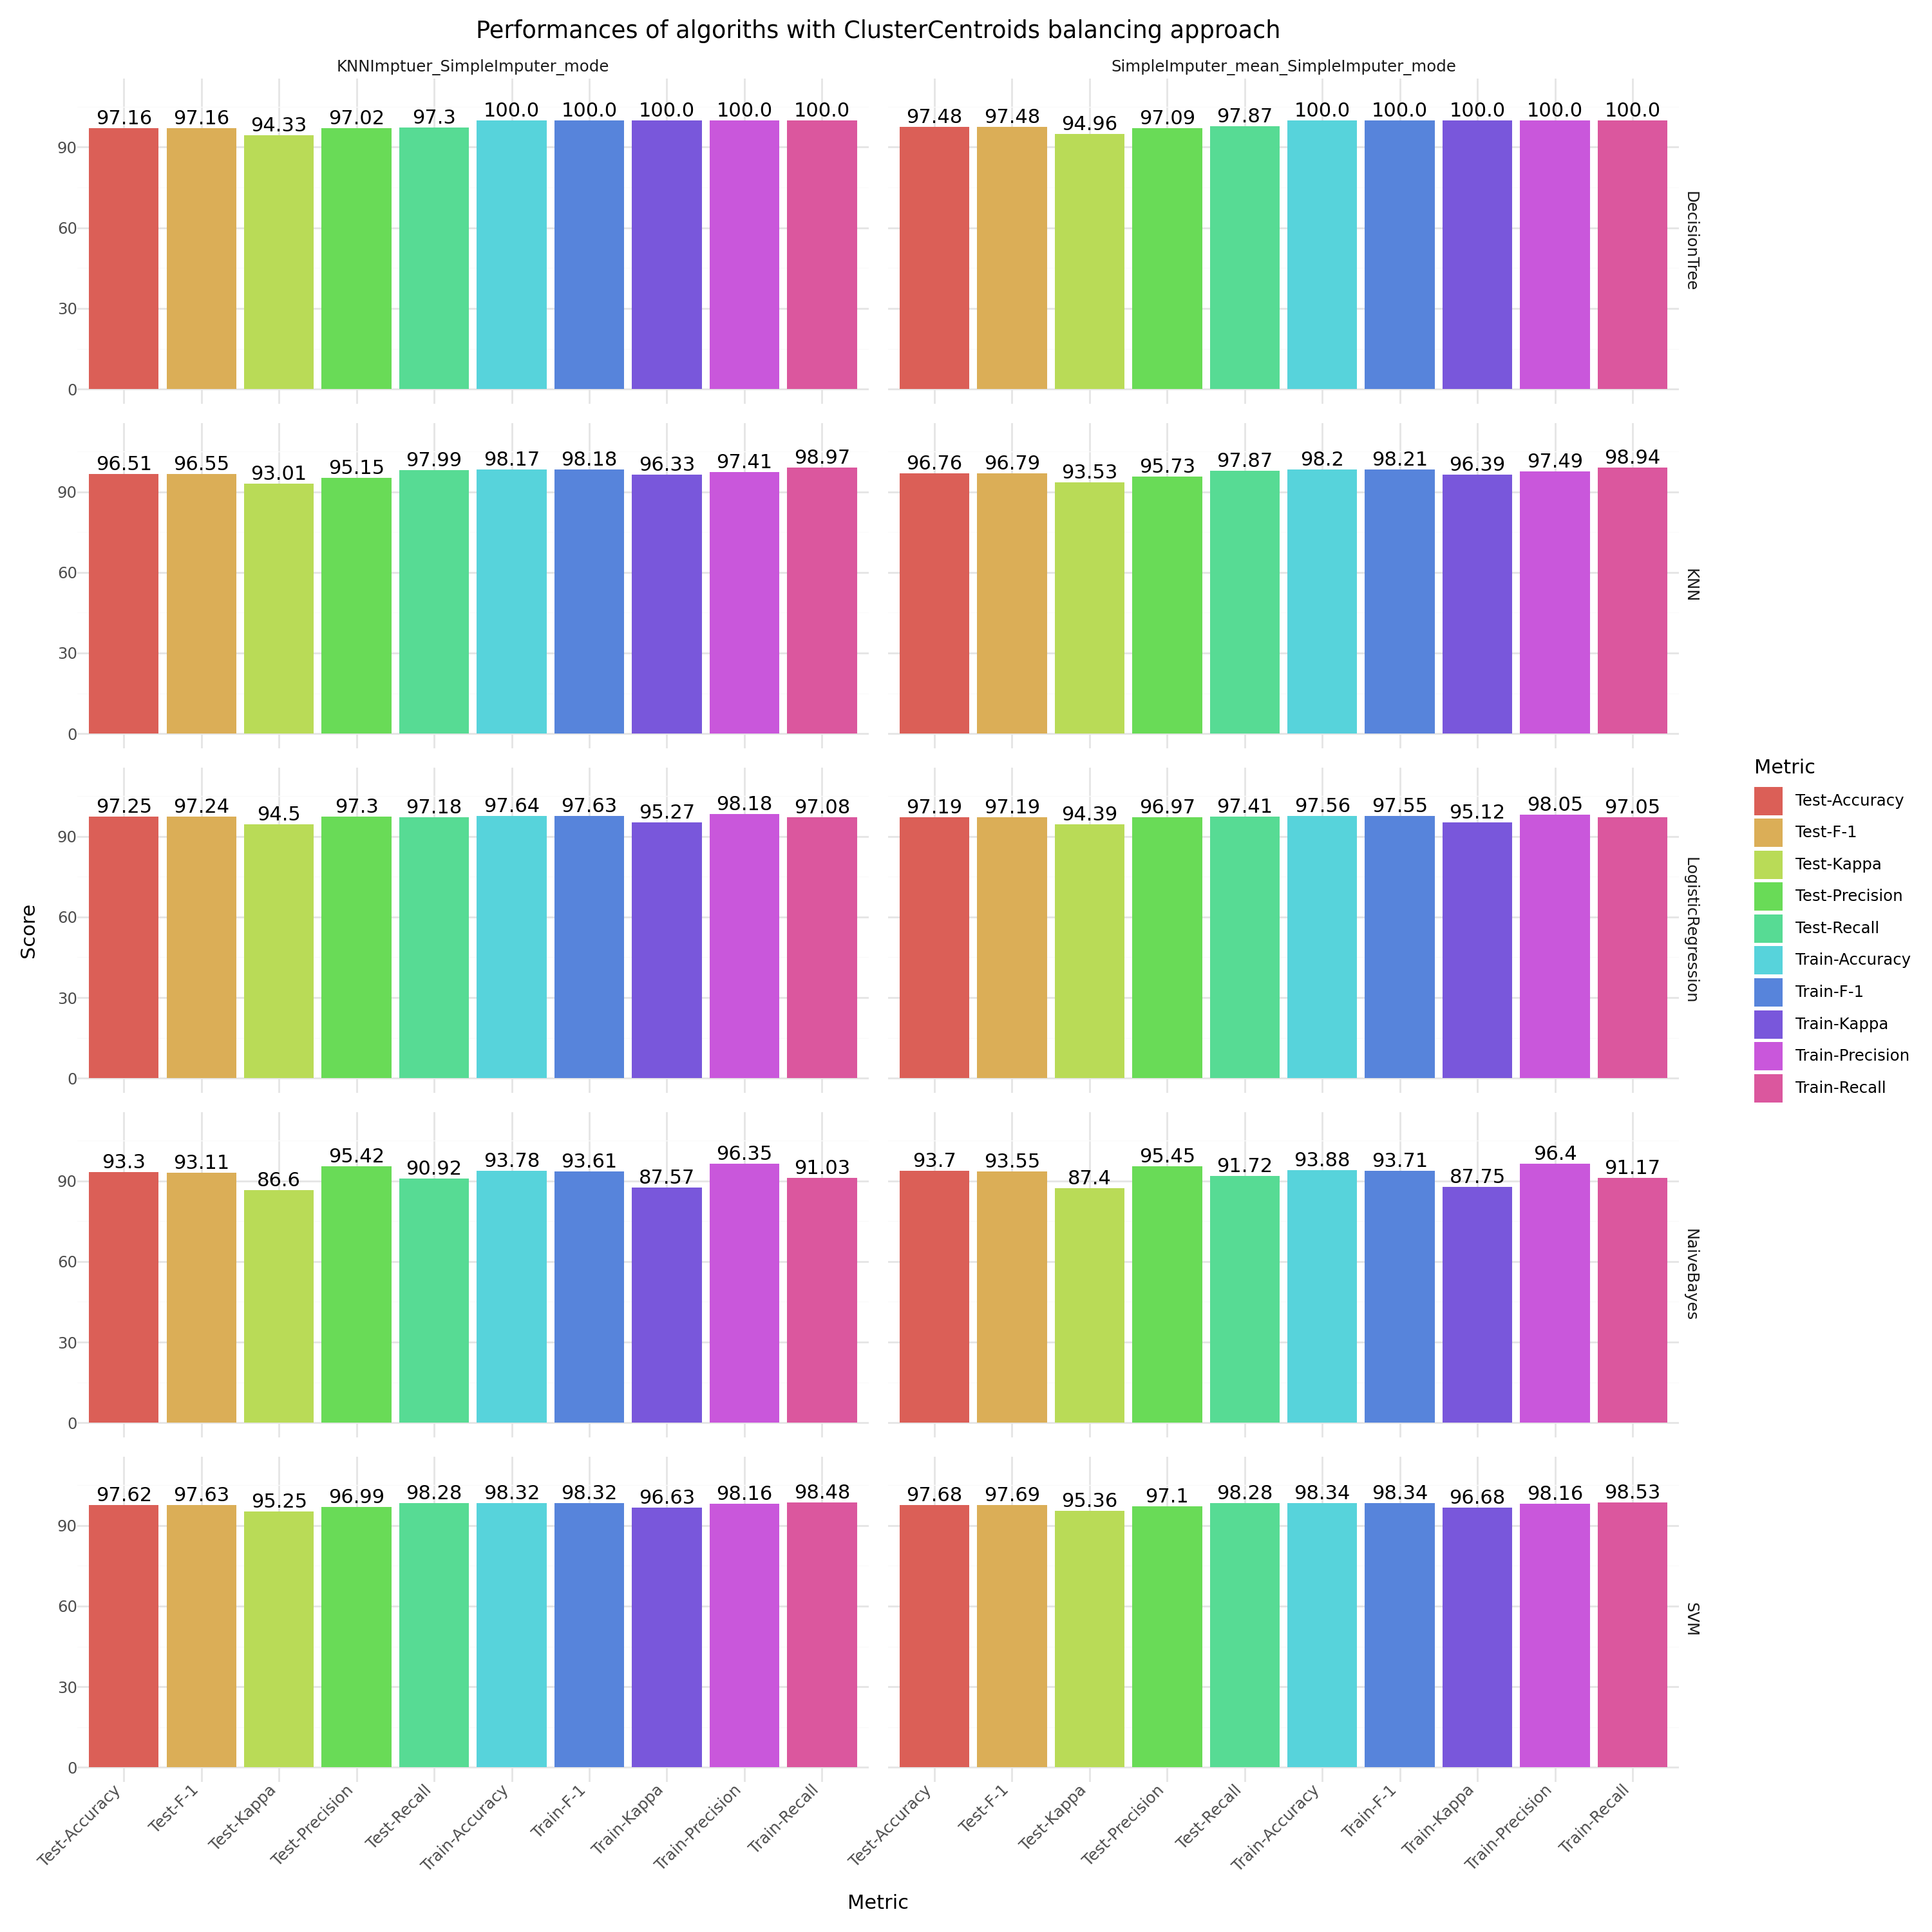

In [196]:
plot_for_each_balancer(df)

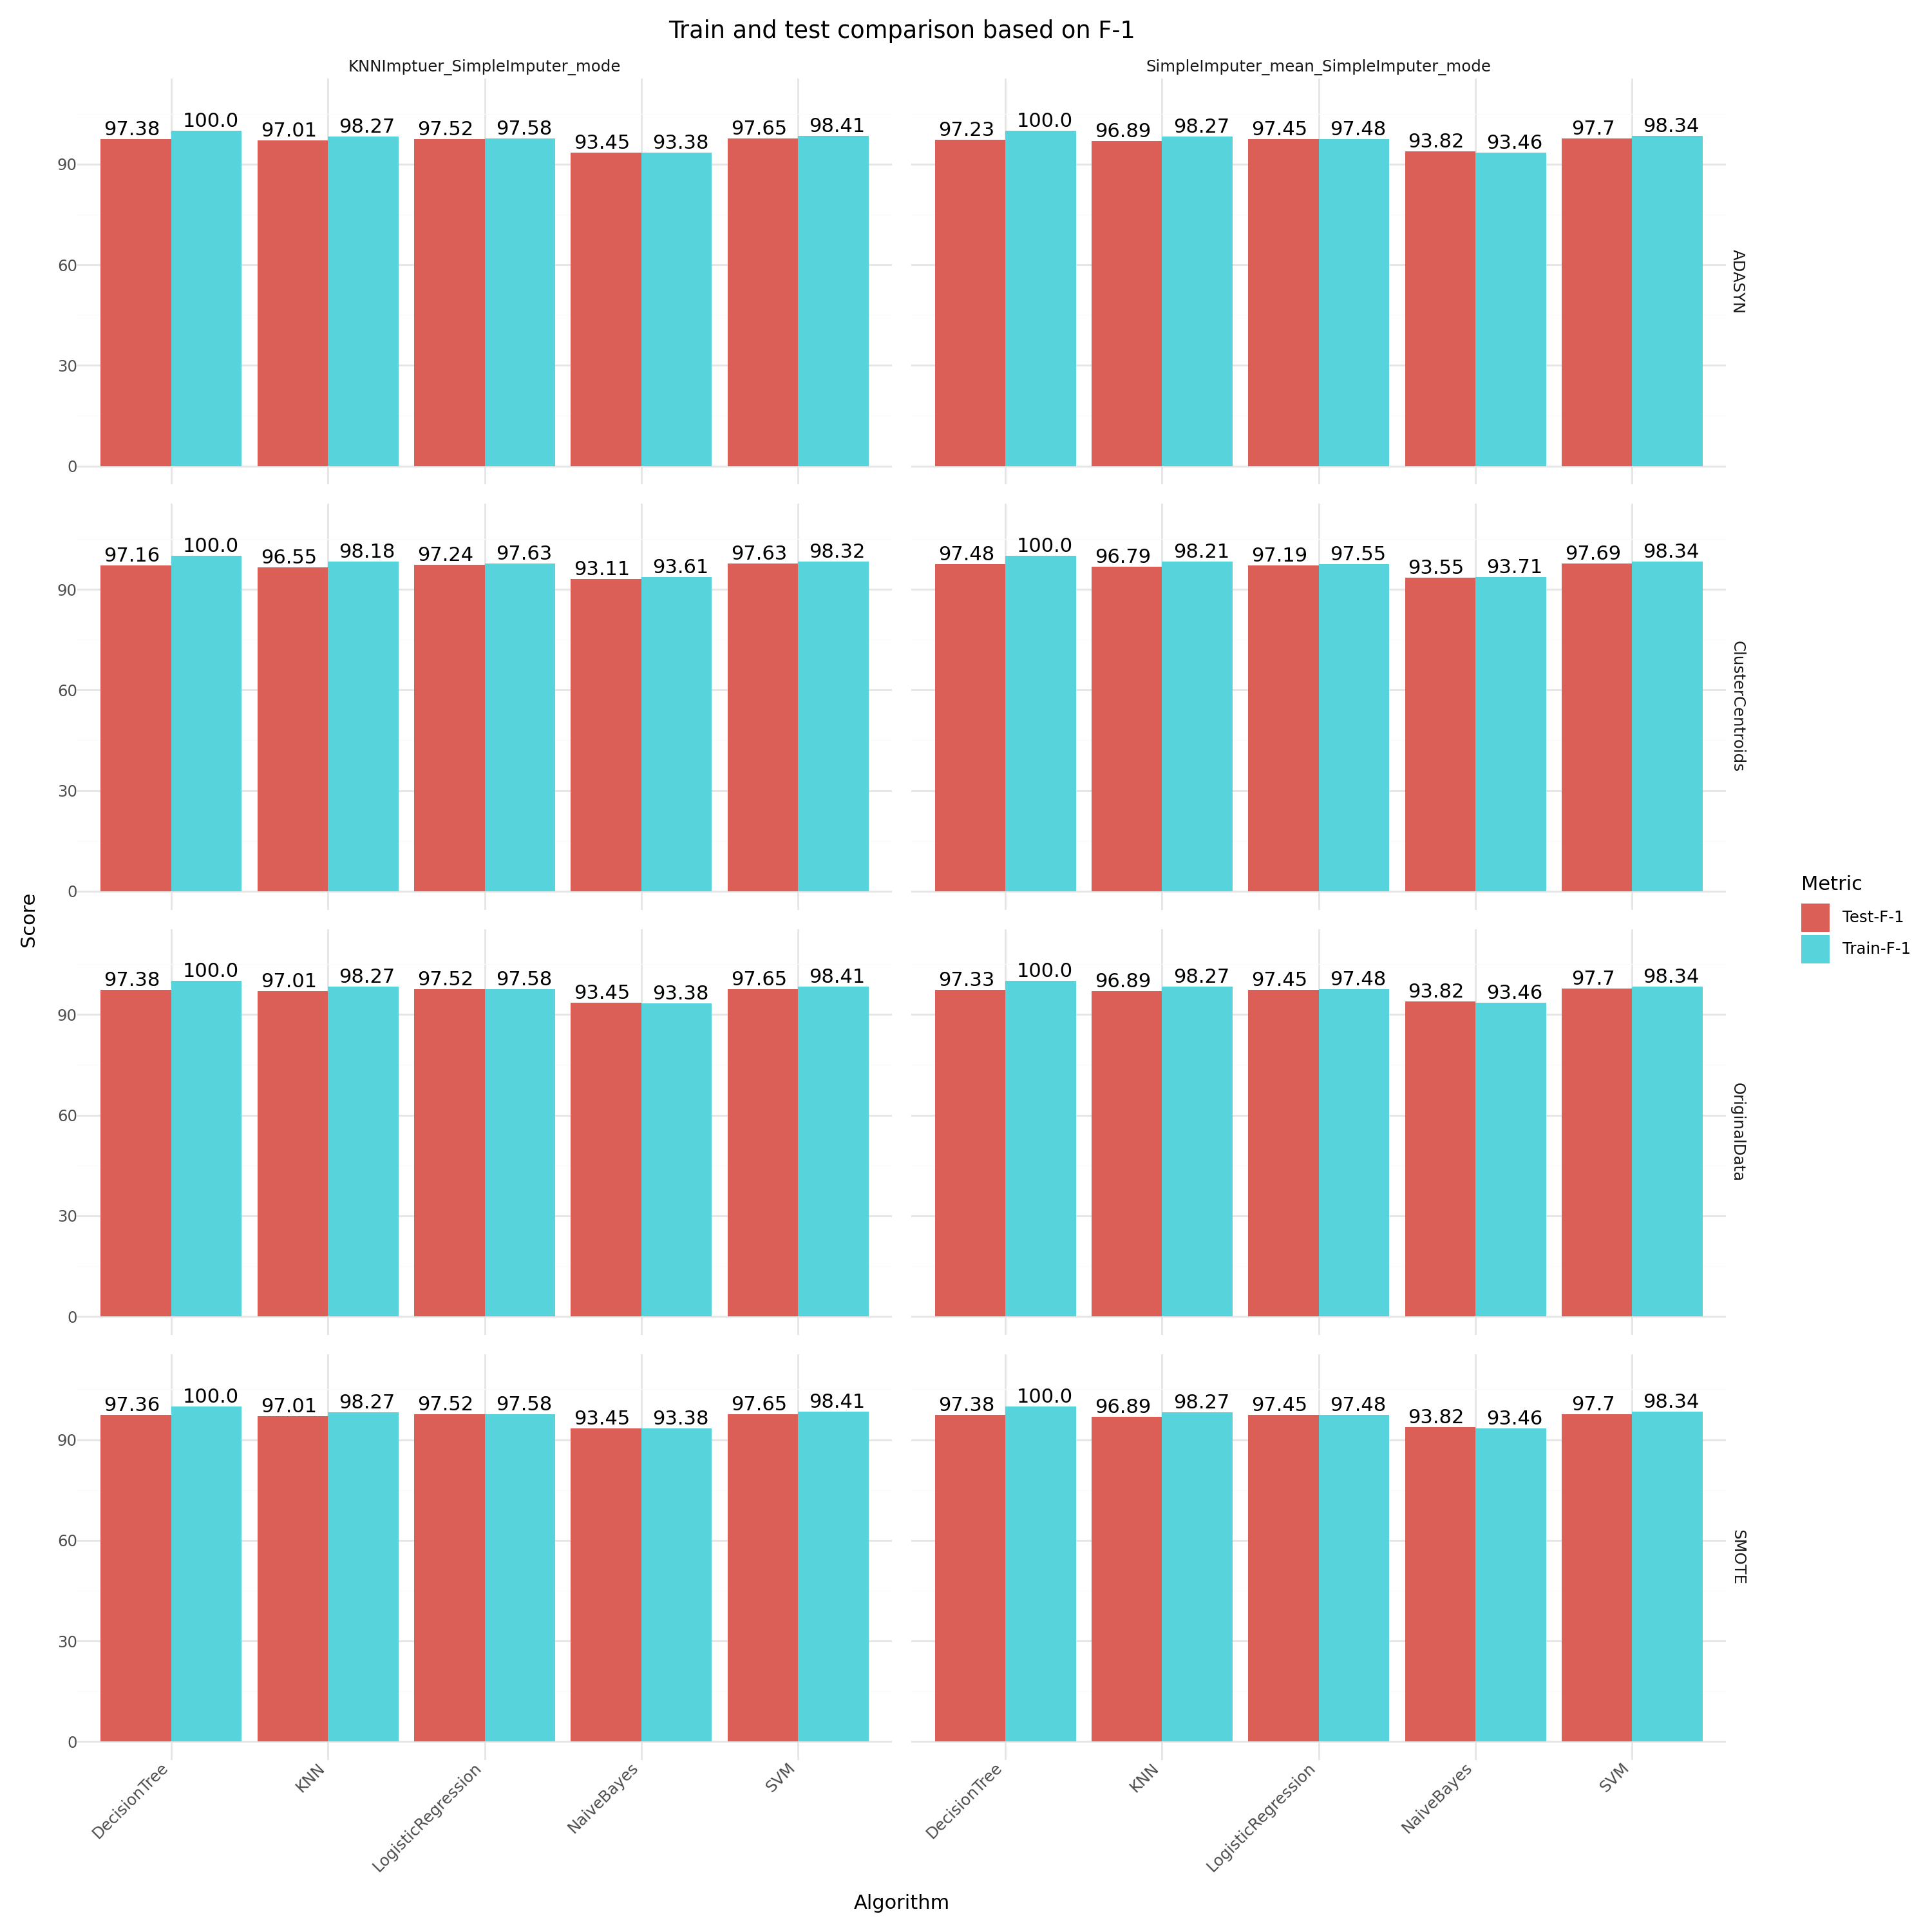

In [198]:
plot_for_each_performance_metric(df)

In [199]:
# side by side best models

df_test = df[df['Set'] == 'Test']
df_train = df[df['Set'] == 'Train']
def get_max_score(group):
    return 

max_scores_test = df_test.groupby(["Algorithm","Metric"]).apply(get_max_score).reset_index(drop=True)
max_scores_train = df_train.groupby(['Algorithm','Metric']).apply(get_max_score).reset_index(drop=True)

In [200]:
def plot_max_score(df,set_='Test'):


    get_max_score = lambda group: group.loc[group['Score'].idxmax()]

    df_set = df[df['Set'] == set_]
    max_scores = df_set.groupby(['Algorithm','Metric']).apply(get_max_score).reset_index(drop=True)

    return max_scores
    

    

    

In [201]:
plot_max_score(df)

Algorithm                                Imputer  \
0         DecisionTree  SimpleImputer_mean_SimpleImputer_mode   
1         DecisionTree  SimpleImputer_mean_SimpleImputer_mode   
2         DecisionTree  SimpleImputer_mean_SimpleImputer_mode   
3         DecisionTree  SimpleImputer_mean_SimpleImputer_mode   
4         DecisionTree  SimpleImputer_mean_SimpleImputer_mode   
5                  KNN          KNNImptuer_SimpleImputer_mode   
6                  KNN          KNNImptuer_SimpleImputer_mode   
7                  KNN          KNNImptuer_SimpleImputer_mode   
8                  KNN  SimpleImputer_mean_SimpleImputer_mode   
9                  KNN          KNNImptuer_SimpleImputer_mode   
10  LogisticRegression          KNNImptuer_SimpleImputer_mode   
11  LogisticRegression          KNNImptuer_SimpleImputer_mode   
12  LogisticRegression          KNNImptuer_SimpleImputer_mode   
13  LogisticRegression  SimpleImputer_mean_SimpleImputer_mode   
14  LogisticRegression          KNNImptuer_SimpleImputer_mode   
15          NaiveBayes  SimpleImputer_mean_SimpleImputer_mode   
16          NaiveBayes  SimpleImputer_mean_SimpleImputer_mode   
17          NaiveBayes  SimpleImputer_mean_SimpleImputer_mode   
18          NaiveBayes  SimpleImputer_mean_SimpleImputer_mode   
19          NaiveBayes  SimpleImputer_mean_SimpleImputer_mode   
20                 SVM  SimpleImputer_mean_SimpleImputer_mode   
21                 SVM  SimpleImputer_mean_SimpleImputer_mode   
22                 SVM  SimpleImputer_mean_SimpleImputer_mode   
23                 SVM  SimpleImputer_mean_SimpleImputer_mode   
24                 SVM          KNNImptuer_SimpleImputer_mode   

           Imbalance          Metric  Score   Set MainMetric  
0   ClusterCentroids   Test-Accuracy  97.48  Test   Accuracy  
1   ClusterCentroids        Test-F-1  97.48  Test        F-1  
2   ClusterCentroids      Test-Kappa  94.96  Test      Kappa  
3             ADASYN  Test-Precision  97.10  Test  Precision  
4   ClusterCentroids     Test-Recall  97.87  Test     Recall  
5              SMOTE   Test-Accuracy  96.96  Test   Accuracy  
6              SMOTE        Test-F-1  97.01  Test        F-1  
7              SMOTE      Test-Kappa  93.93  Test      Kappa  
8              SMOTE  Test-Precision  95.86  Test  Precision  
9              SMOTE     Test-Recall  98.34  Test     Recall  
10             SMOTE   Test-Accuracy  97.51  Test   Accuracy  
11             SMOTE        Test-F-1  97.52  Test        F-1  
12             SMOTE      Test-Kappa  95.02  Test      Kappa  
13             SMOTE  Test-Precision  97.65  Test  Precision  
14             SMOTE     Test-Recall  97.54  Test     Recall  
15             SMOTE   Test-Accuracy  93.96  Test   Accuracy  
16             SMOTE        Test-F-1  93.82  Test        F-1  
17             SMOTE      Test-Kappa  87.92  Test      Kappa  
18             SMOTE  Test-Precision  96.27  Test  Precision  
19  ClusterCentroids     Test-Recall  91.72  Test     Recall  
20             SMOTE   Test-Accuracy  97.68  Test   Accuracy  
21             SMOTE        Test-F-1  97.70  Test        F-1  
22             SMOTE      Test-Kappa  95.36  Test      Kappa  
23  ClusterCentroids  Test-Precision  97.10  Test  Precision  
24             SMOTE     Test-Recall  98.57  Test     Recall

In [202]:
plot_max_score(df,set_='Train')

Algorithm                                Imputer  \
0         DecisionTree  SimpleImputer_mean_SimpleImputer_mode   
1         DecisionTree  SimpleImputer_mean_SimpleImputer_mode   
2         DecisionTree  SimpleImputer_mean_SimpleImputer_mode   
3         DecisionTree  SimpleImputer_mean_SimpleImputer_mode   
4         DecisionTree  SimpleImputer_mean_SimpleImputer_mode   
5                  KNN  SimpleImputer_mean_SimpleImputer_mode   
6                  KNN  SimpleImputer_mean_SimpleImputer_mode   
7                  KNN  SimpleImputer_mean_SimpleImputer_mode   
8                  KNN  SimpleImputer_mean_SimpleImputer_mode   
9                  KNN  SimpleImputer_mean_SimpleImputer_mode   
10  LogisticRegression          KNNImptuer_SimpleImputer_mode   
11  LogisticRegression          KNNImptuer_SimpleImputer_mode   
12  LogisticRegression          KNNImptuer_SimpleImputer_mode   
13  LogisticRegression          KNNImptuer_SimpleImputer_mode   
14  LogisticRegression          KNNImptuer_SimpleImputer_mode   
15          NaiveBayes  SimpleImputer_mean_SimpleImputer_mode   
16          NaiveBayes  SimpleImputer_mean_SimpleImputer_mode   
17          NaiveBayes  SimpleImputer_mean_SimpleImputer_mode   
18          NaiveBayes  SimpleImputer_mean_SimpleImputer_mode   
19          NaiveBayes  SimpleImputer_mean_SimpleImputer_mode   
20                 SVM          KNNImptuer_SimpleImputer_mode   
21                 SVM          KNNImptuer_SimpleImputer_mode   
22                 SVM          KNNImptuer_SimpleImputer_mode   
23                 SVM  SimpleImputer_mean_SimpleImputer_mode   
24                 SVM          KNNImptuer_SimpleImputer_mode   

           Imbalance           Metric   Score    Set MainMetric  
0              SMOTE   Train-Accuracy  100.00  Train   Accuracy  
1              SMOTE        Train-F-1  100.00  Train        F-1  
2              SMOTE      Train-Kappa  100.00  Train      Kappa  
3              SMOTE  Train-Precision  100.00  Train  Precision  
4              SMOTE     Train-Recall  100.00  Train     Recall  
5              SMOTE   Train-Accuracy   98.25  Train   Accuracy  
6              SMOTE        Train-F-1   98.27  Train        F-1  
7              SMOTE      Train-Kappa   96.51  Train      Kappa  
8              SMOTE  Train-Precision   97.49  Train  Precision  
9              SMOTE     Train-Recall   99.05  Train     Recall  
10  ClusterCentroids   Train-Accuracy   97.64  Train   Accuracy  
11  ClusterCentroids        Train-F-1   97.63  Train        F-1  
12  ClusterCentroids      Train-Kappa   95.27  Train      Kappa  
13  ClusterCentroids  Train-Precision   98.18  Train  Precision  
14             SMOTE     Train-Recall   97.28  Train     Recall  
15  ClusterCentroids   Train-Accuracy   93.88  Train   Accuracy  
16  ClusterCentroids        Train-F-1   93.71  Train        F-1  
17  ClusterCentroids      Train-Kappa   87.75  Train      Kappa  
18  ClusterCentroids  Train-Precision   96.40  Train  Precision  
19  ClusterCentroids     Train-Recall   91.17  Train     Recall  
20             SMOTE   Train-Accuracy   98.40  Train   Accuracy  
21             SMOTE        Train-F-1   98.41  Train        F-1  
22             SMOTE      Train-Kappa   96.81  Train      Kappa  
23  ClusterCentroids  Train-Precision   98.16  Train  Precision  
24             SMOTE     Train-Recall   98.93  Train     Recall

## Draft

In [16]:
bar_plot = plt9.ggplot(bal_df, plt9.aes(x='Algorithm', y='Score', fill='Metrics')) + \
           plt9.facet_grid(rows='Imbalance',cols='Set') + \
           plt9.geom_col(position='dodge') + \
           plt9.theme_minimal() + \
           plt9.theme(figure_size=(15,15)) 
           # plt9.geom_text()




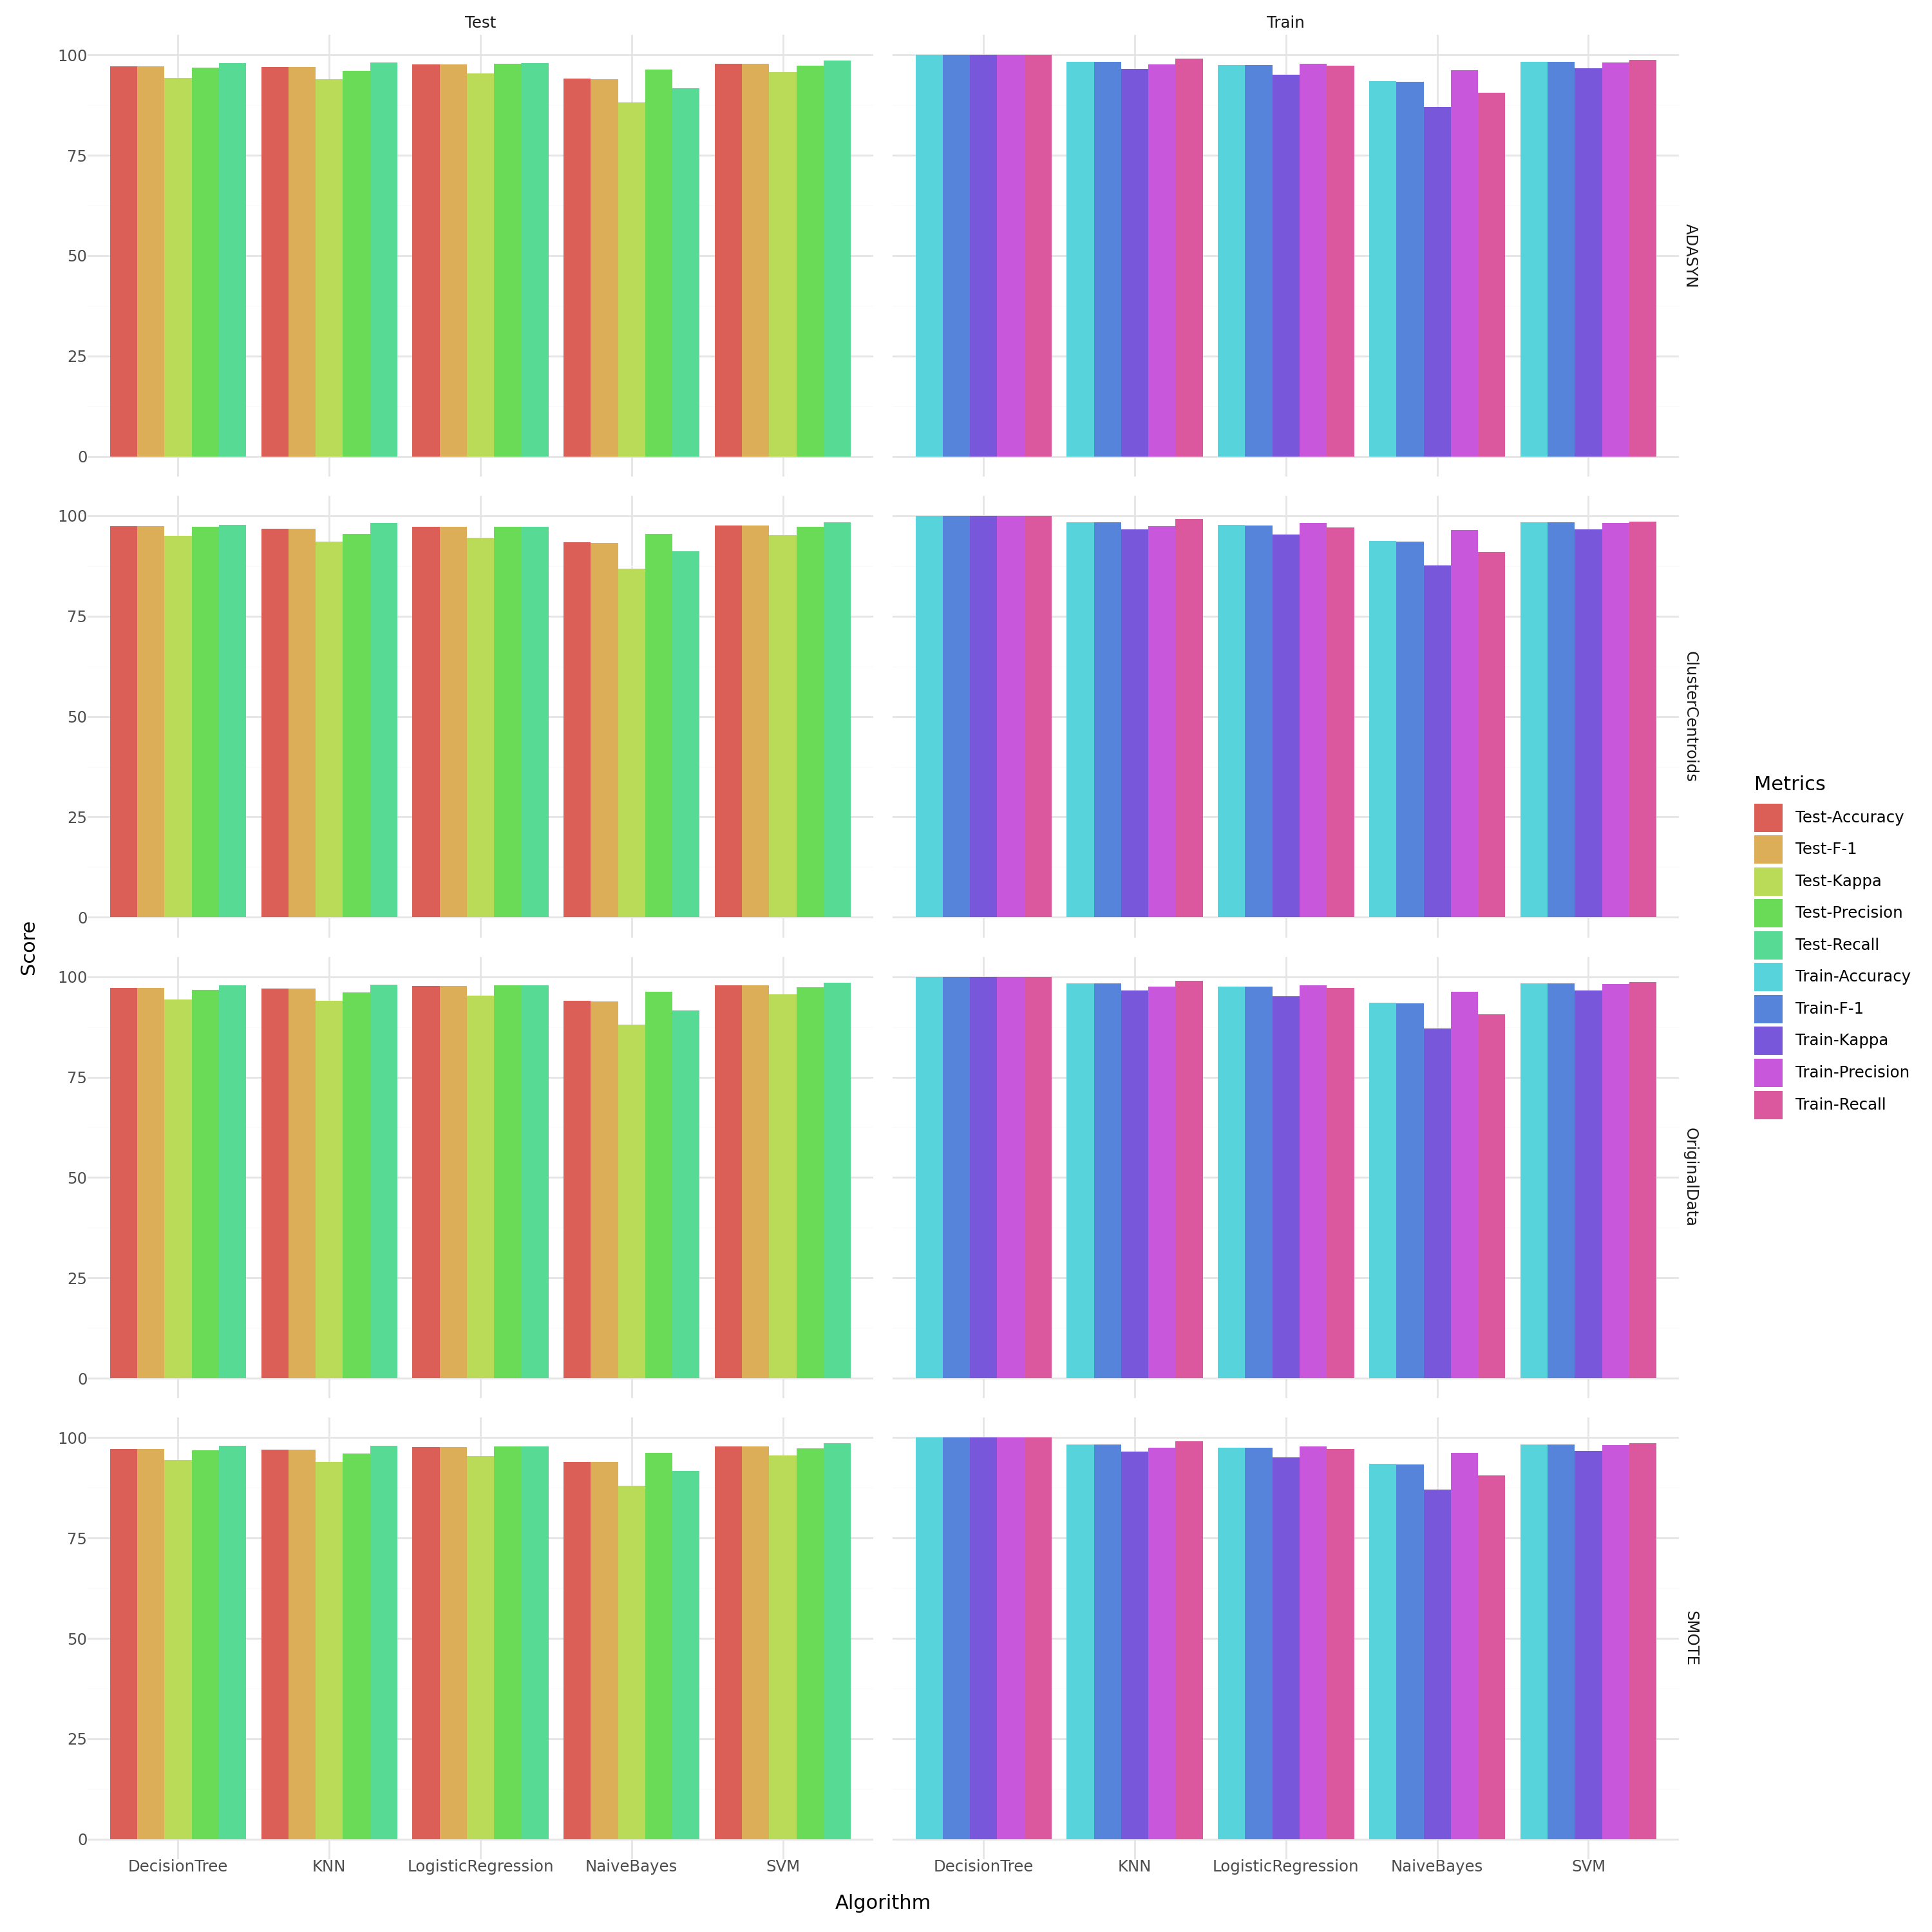

In [18]:
bar_plot.show()

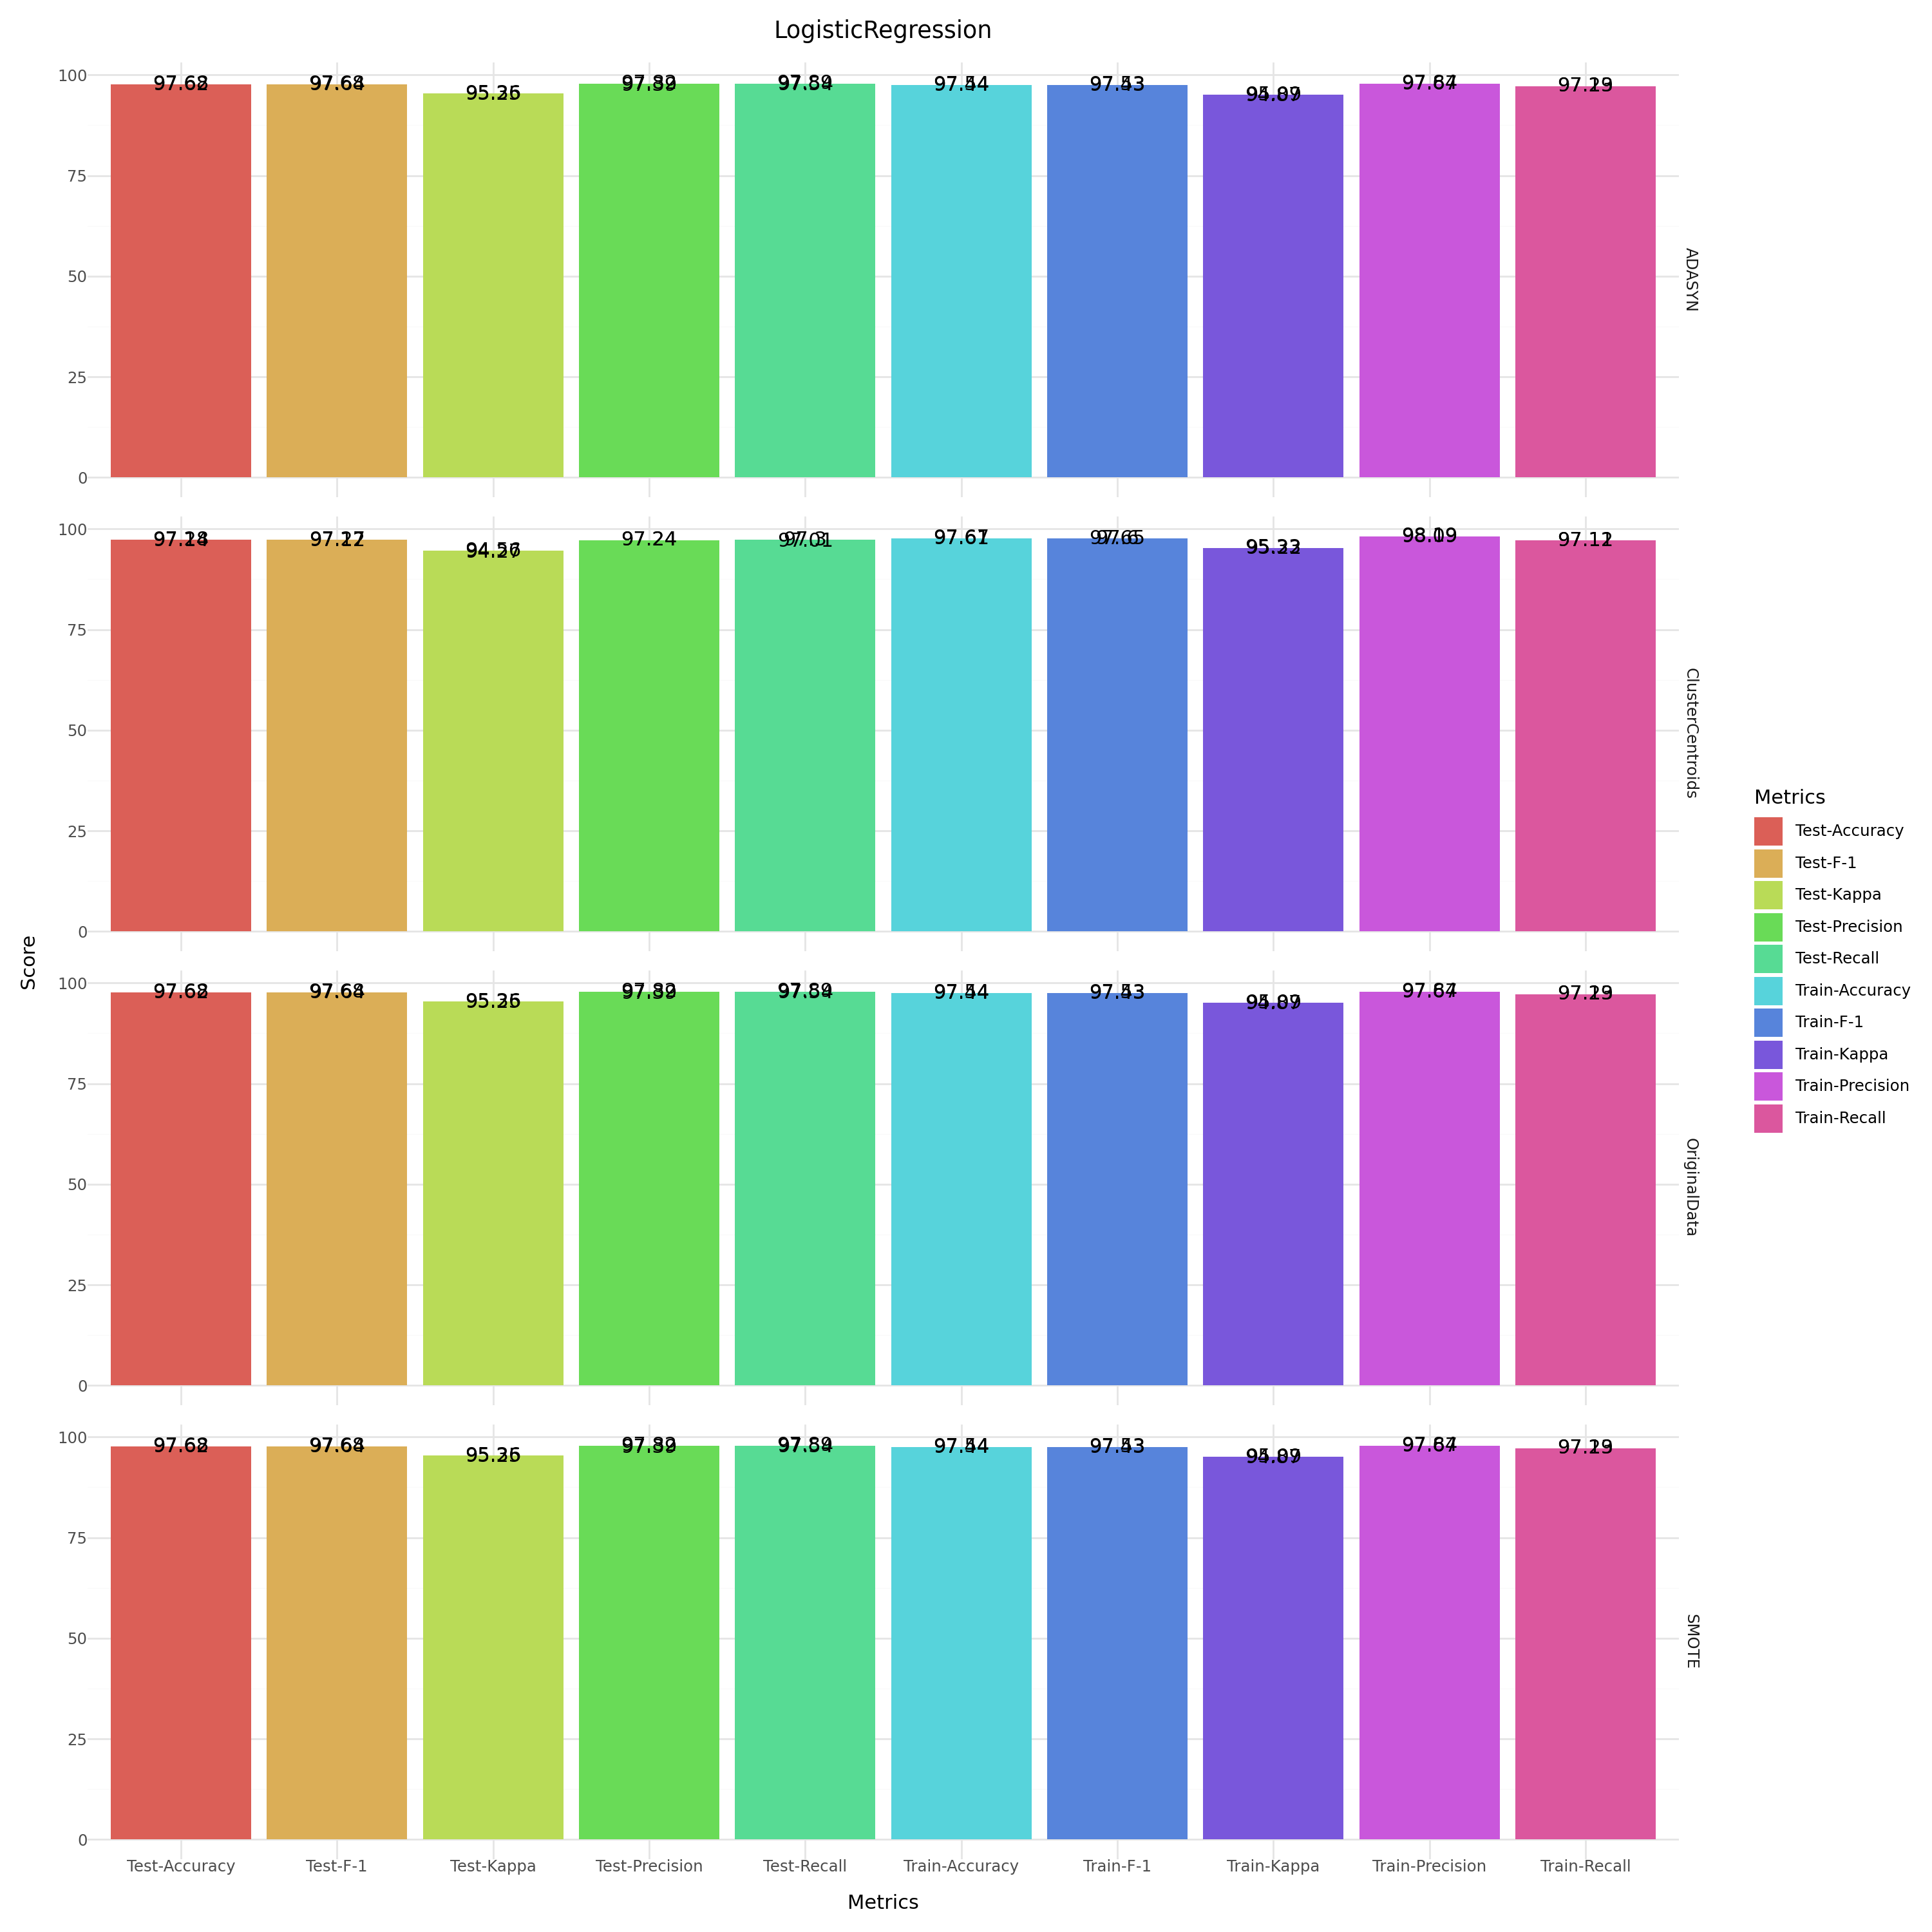

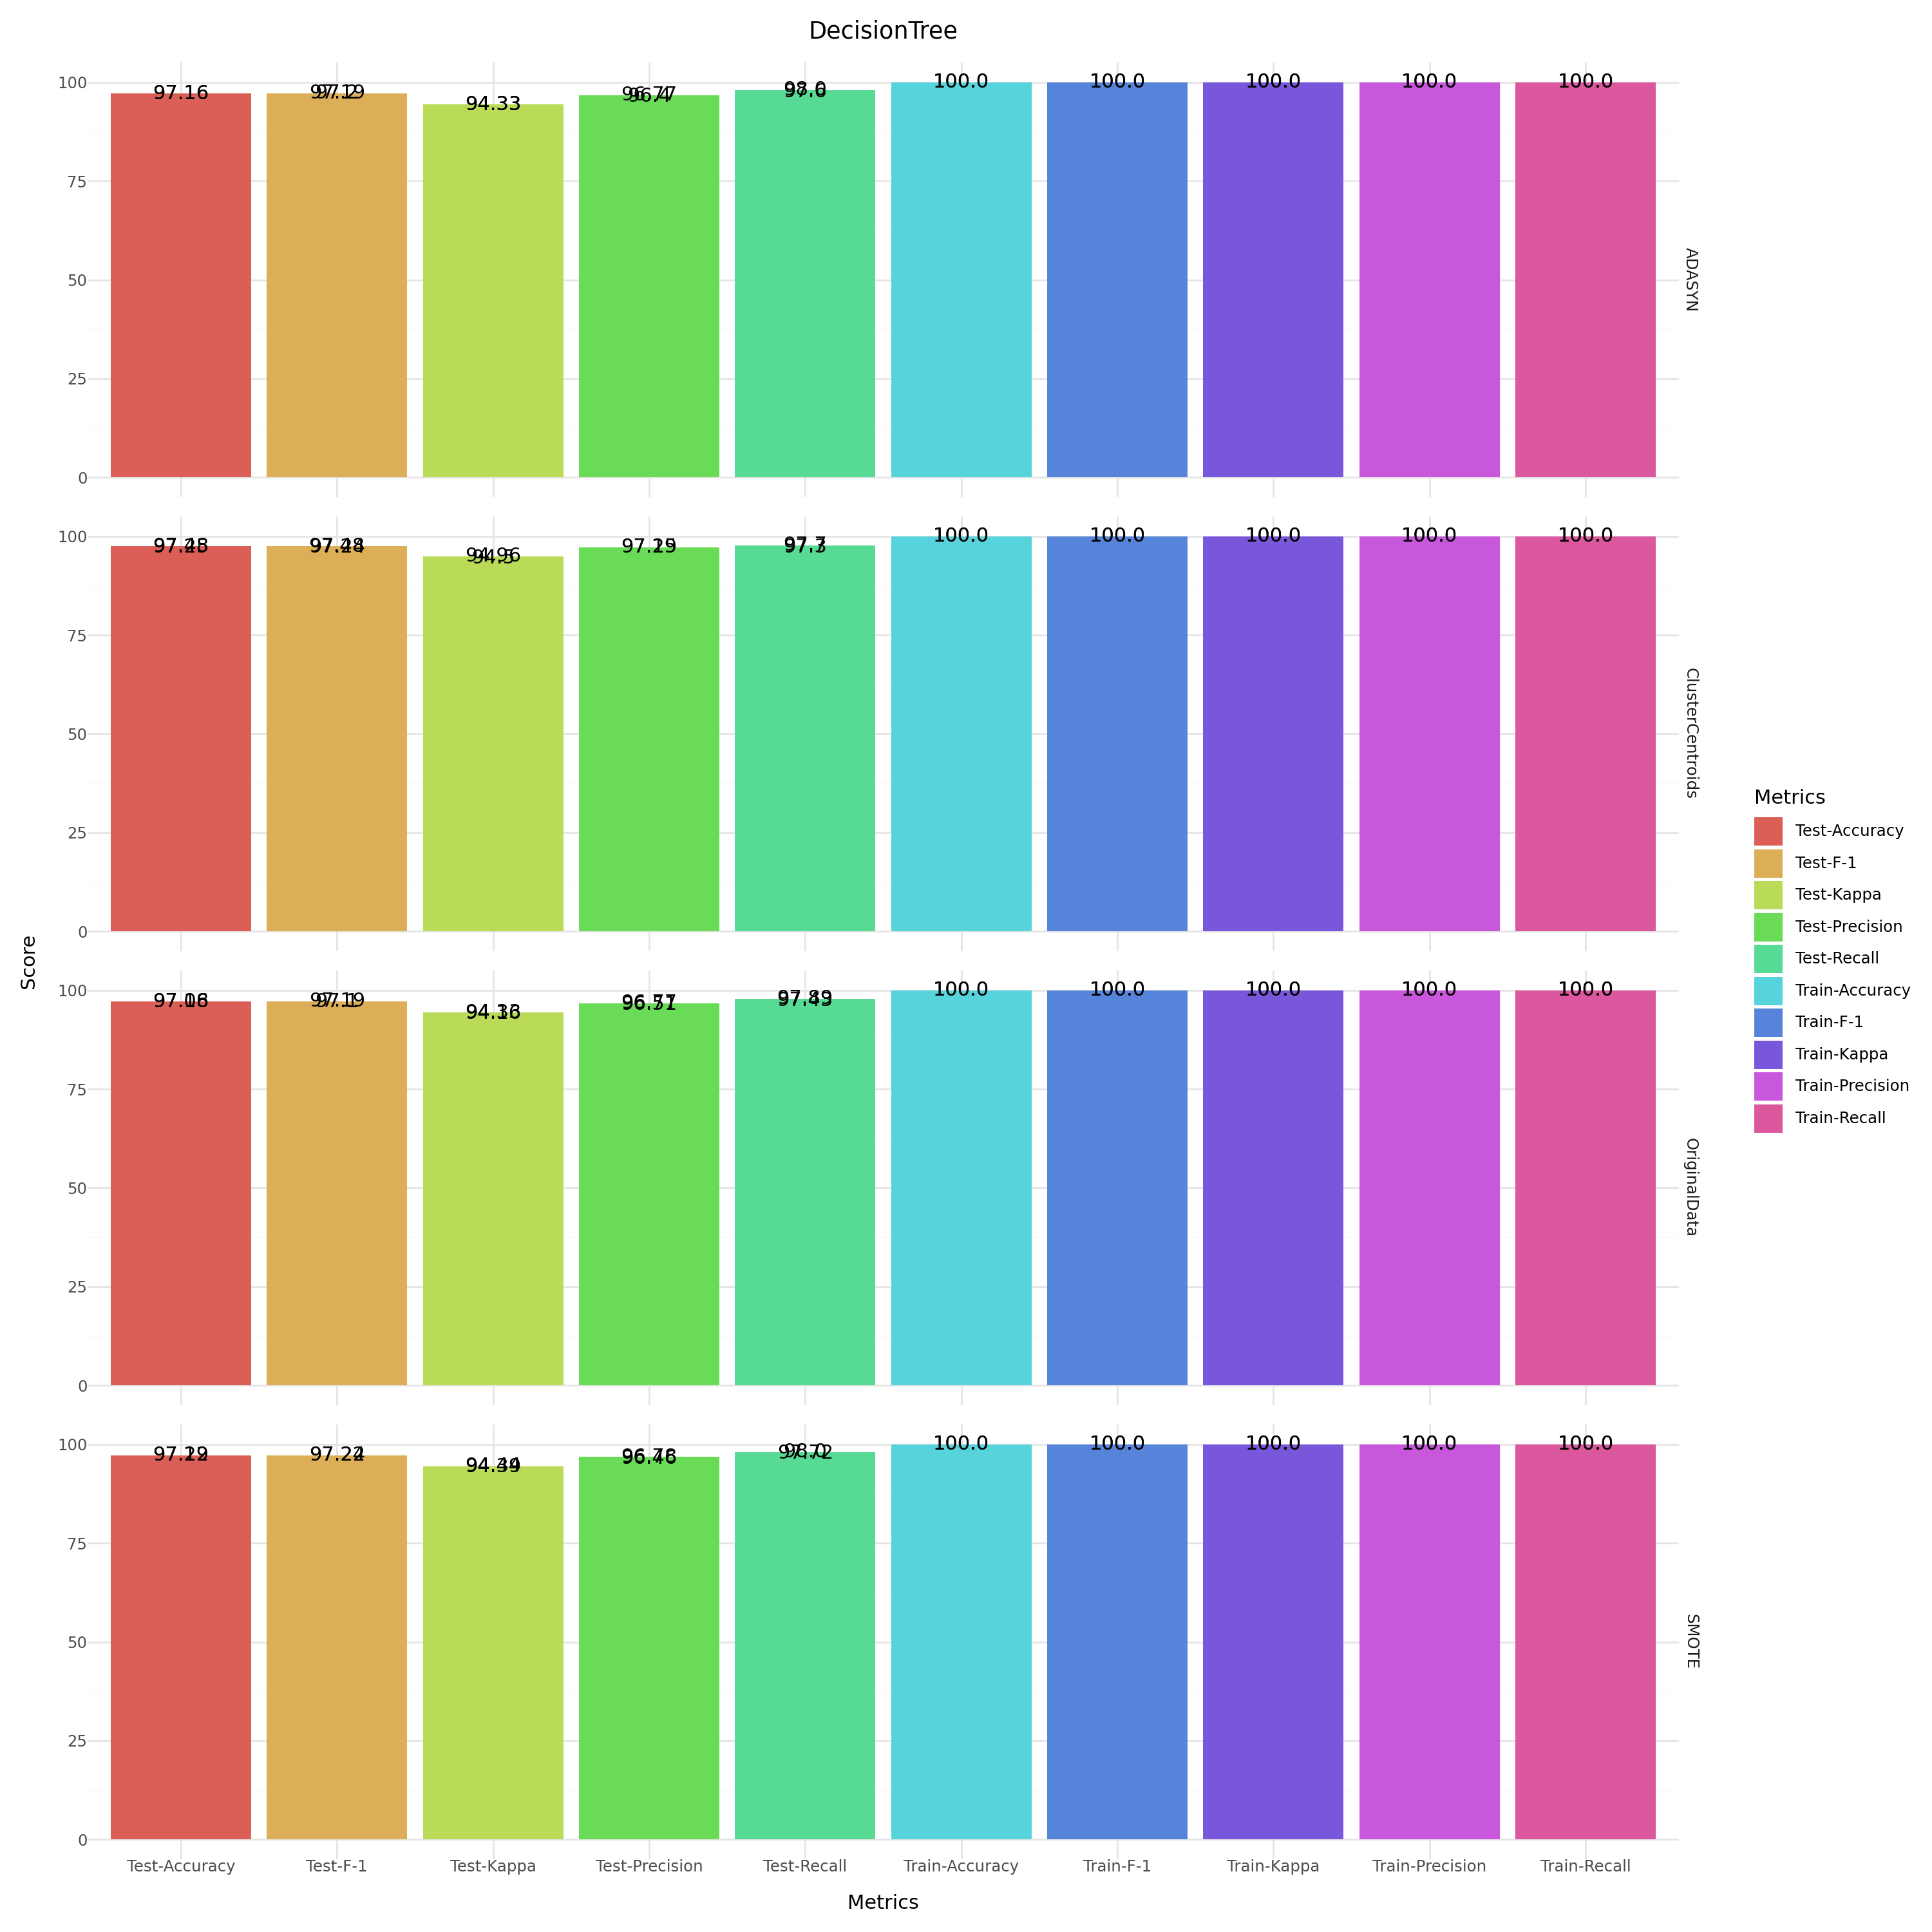

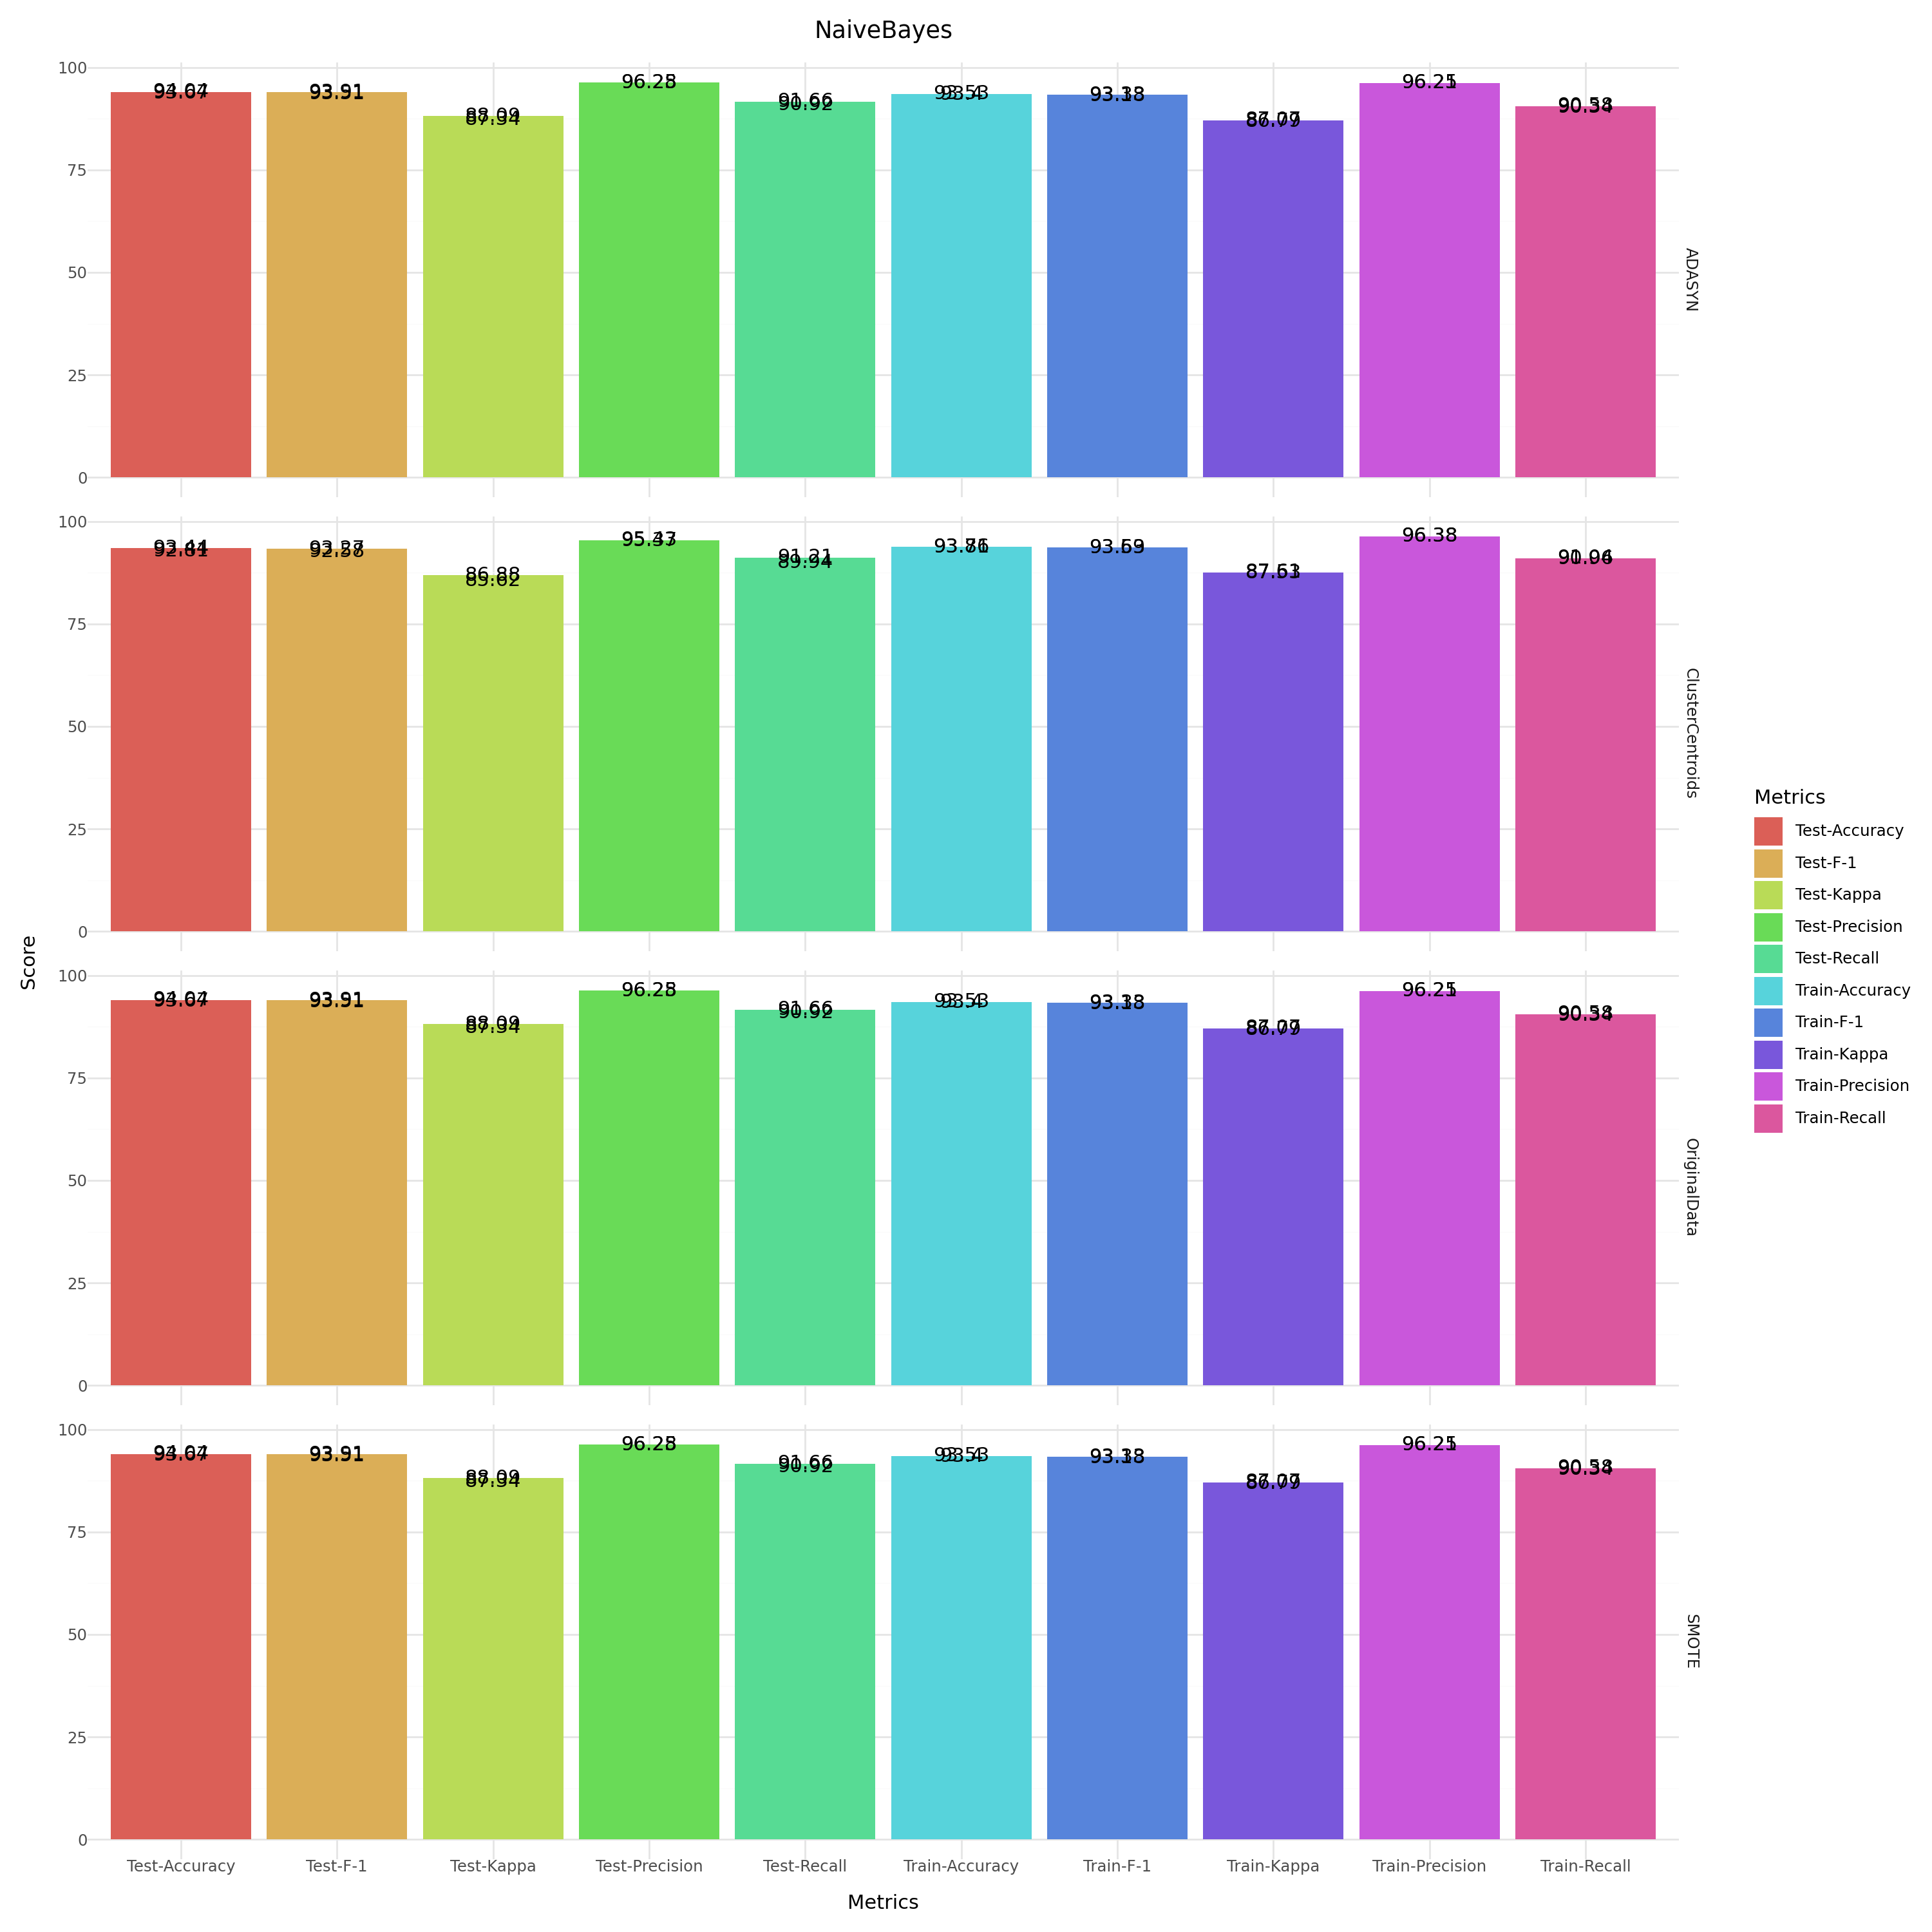

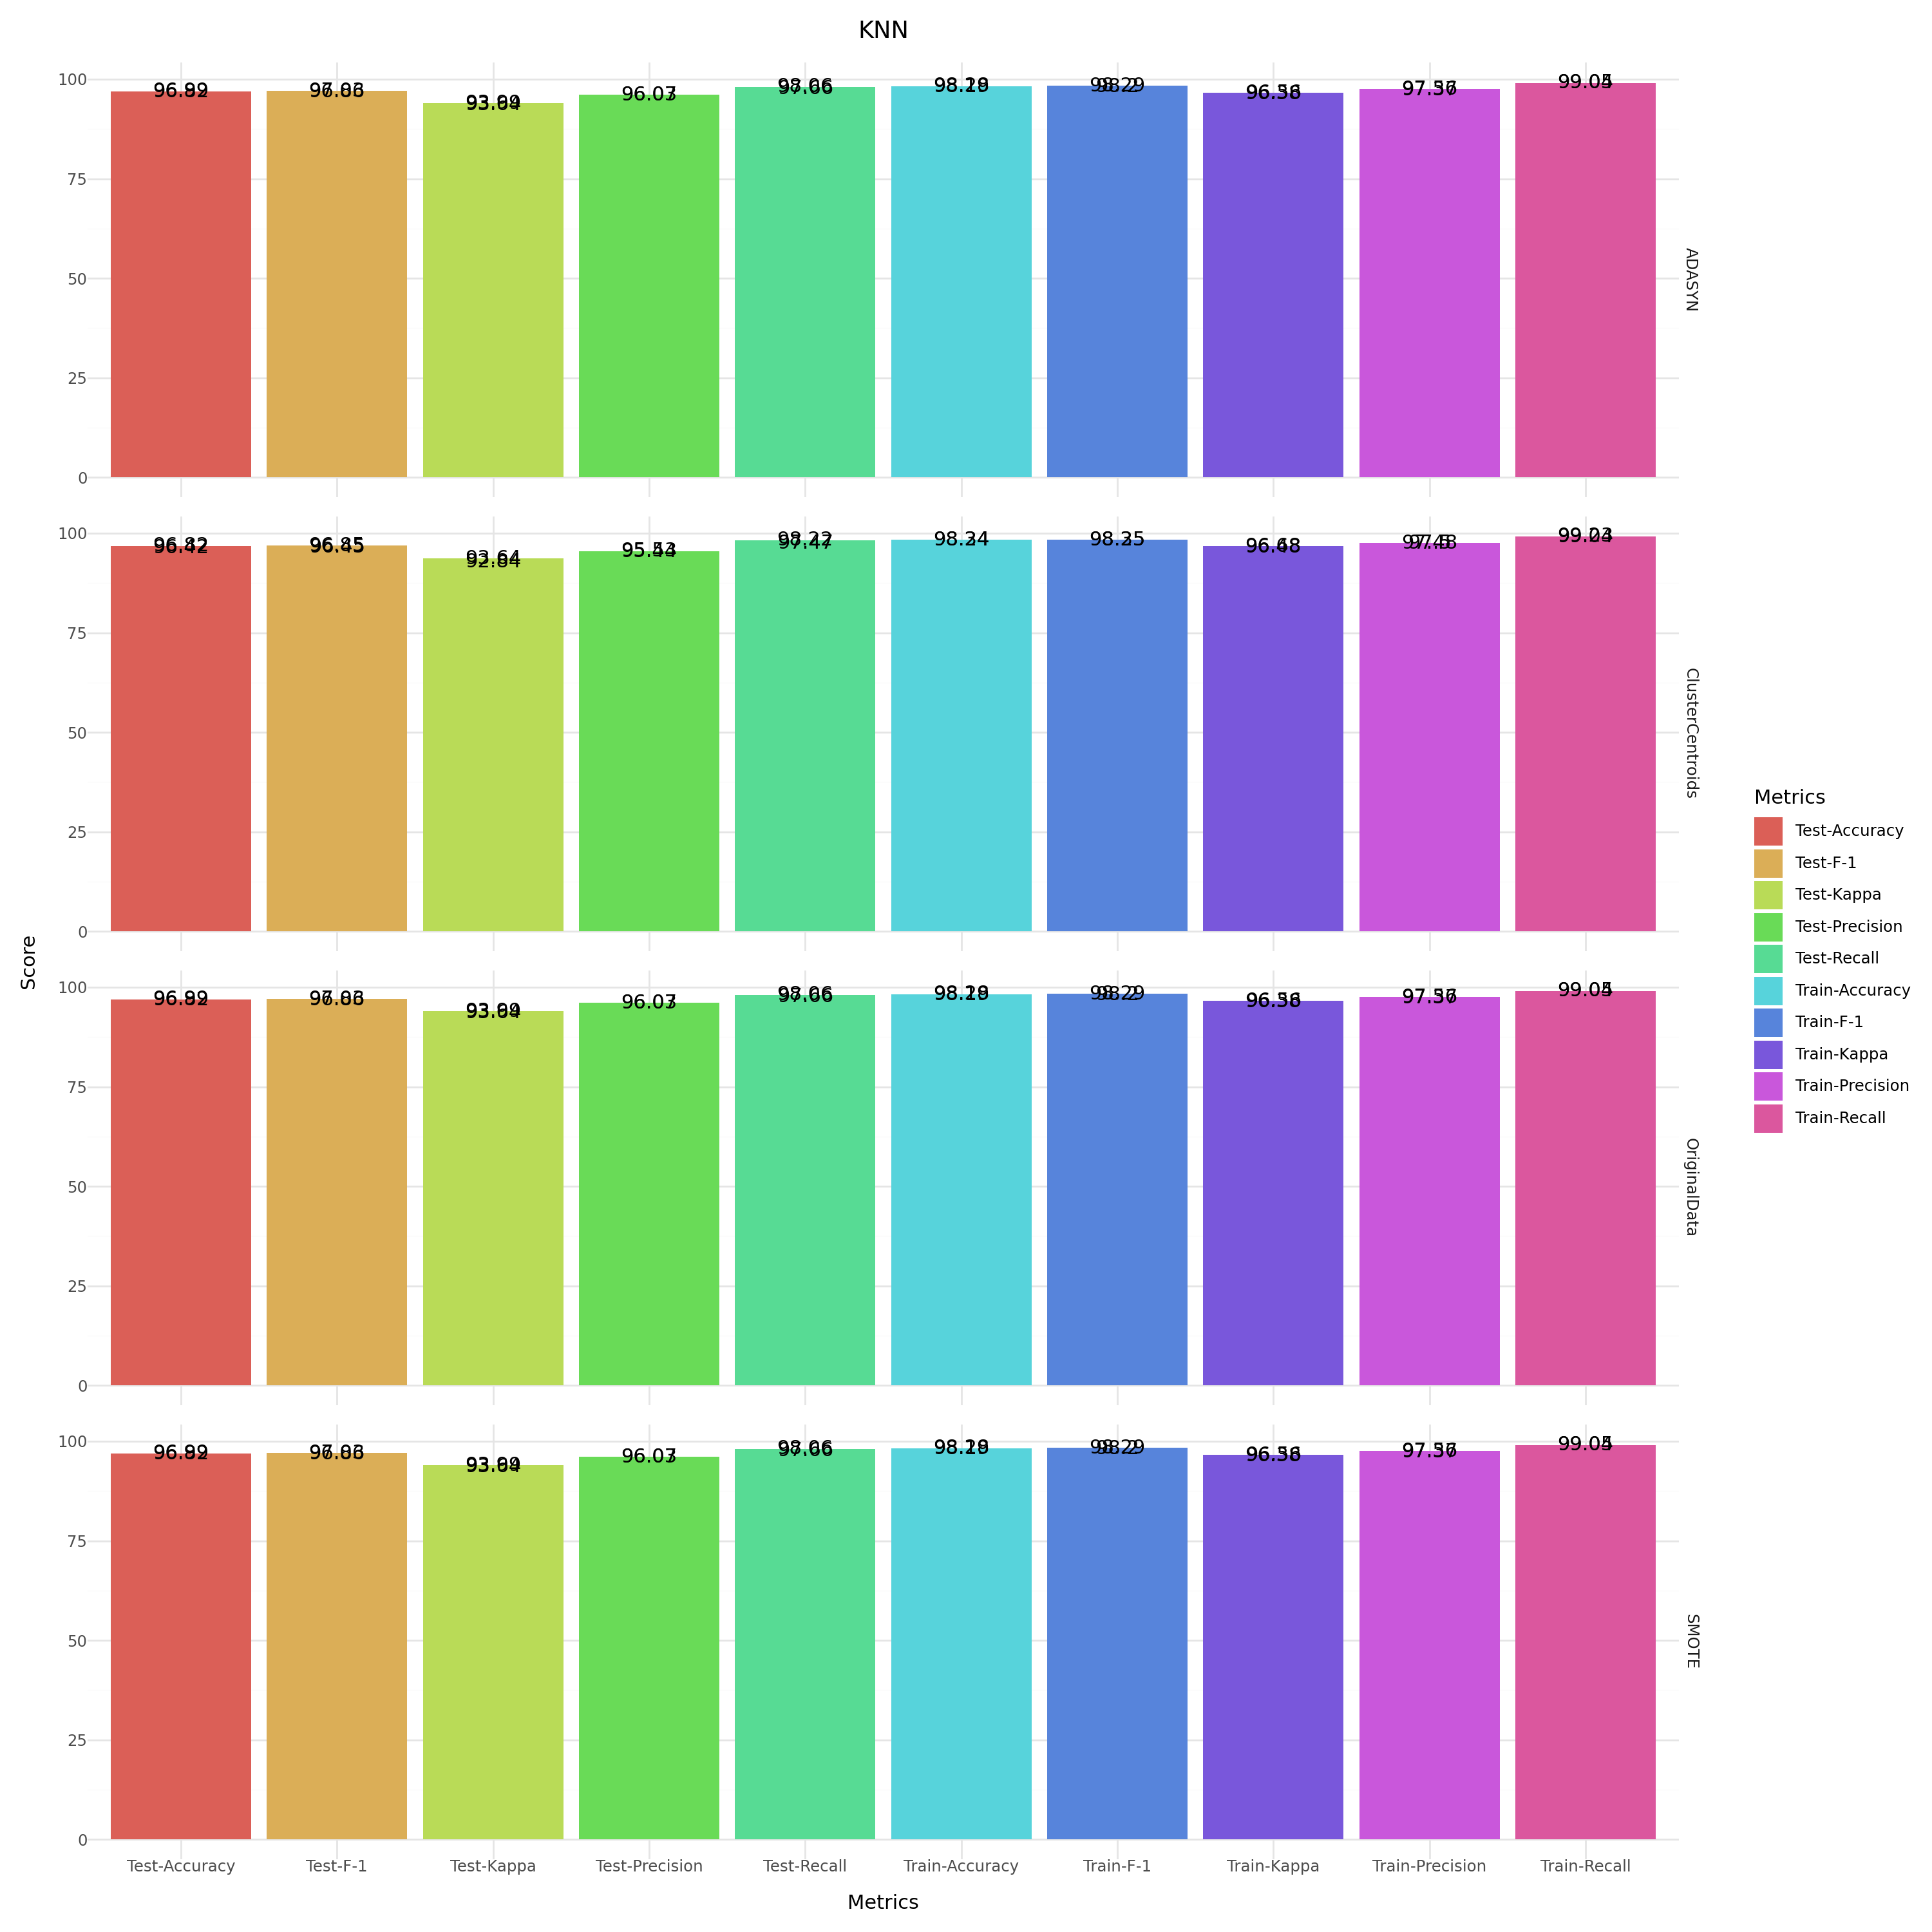

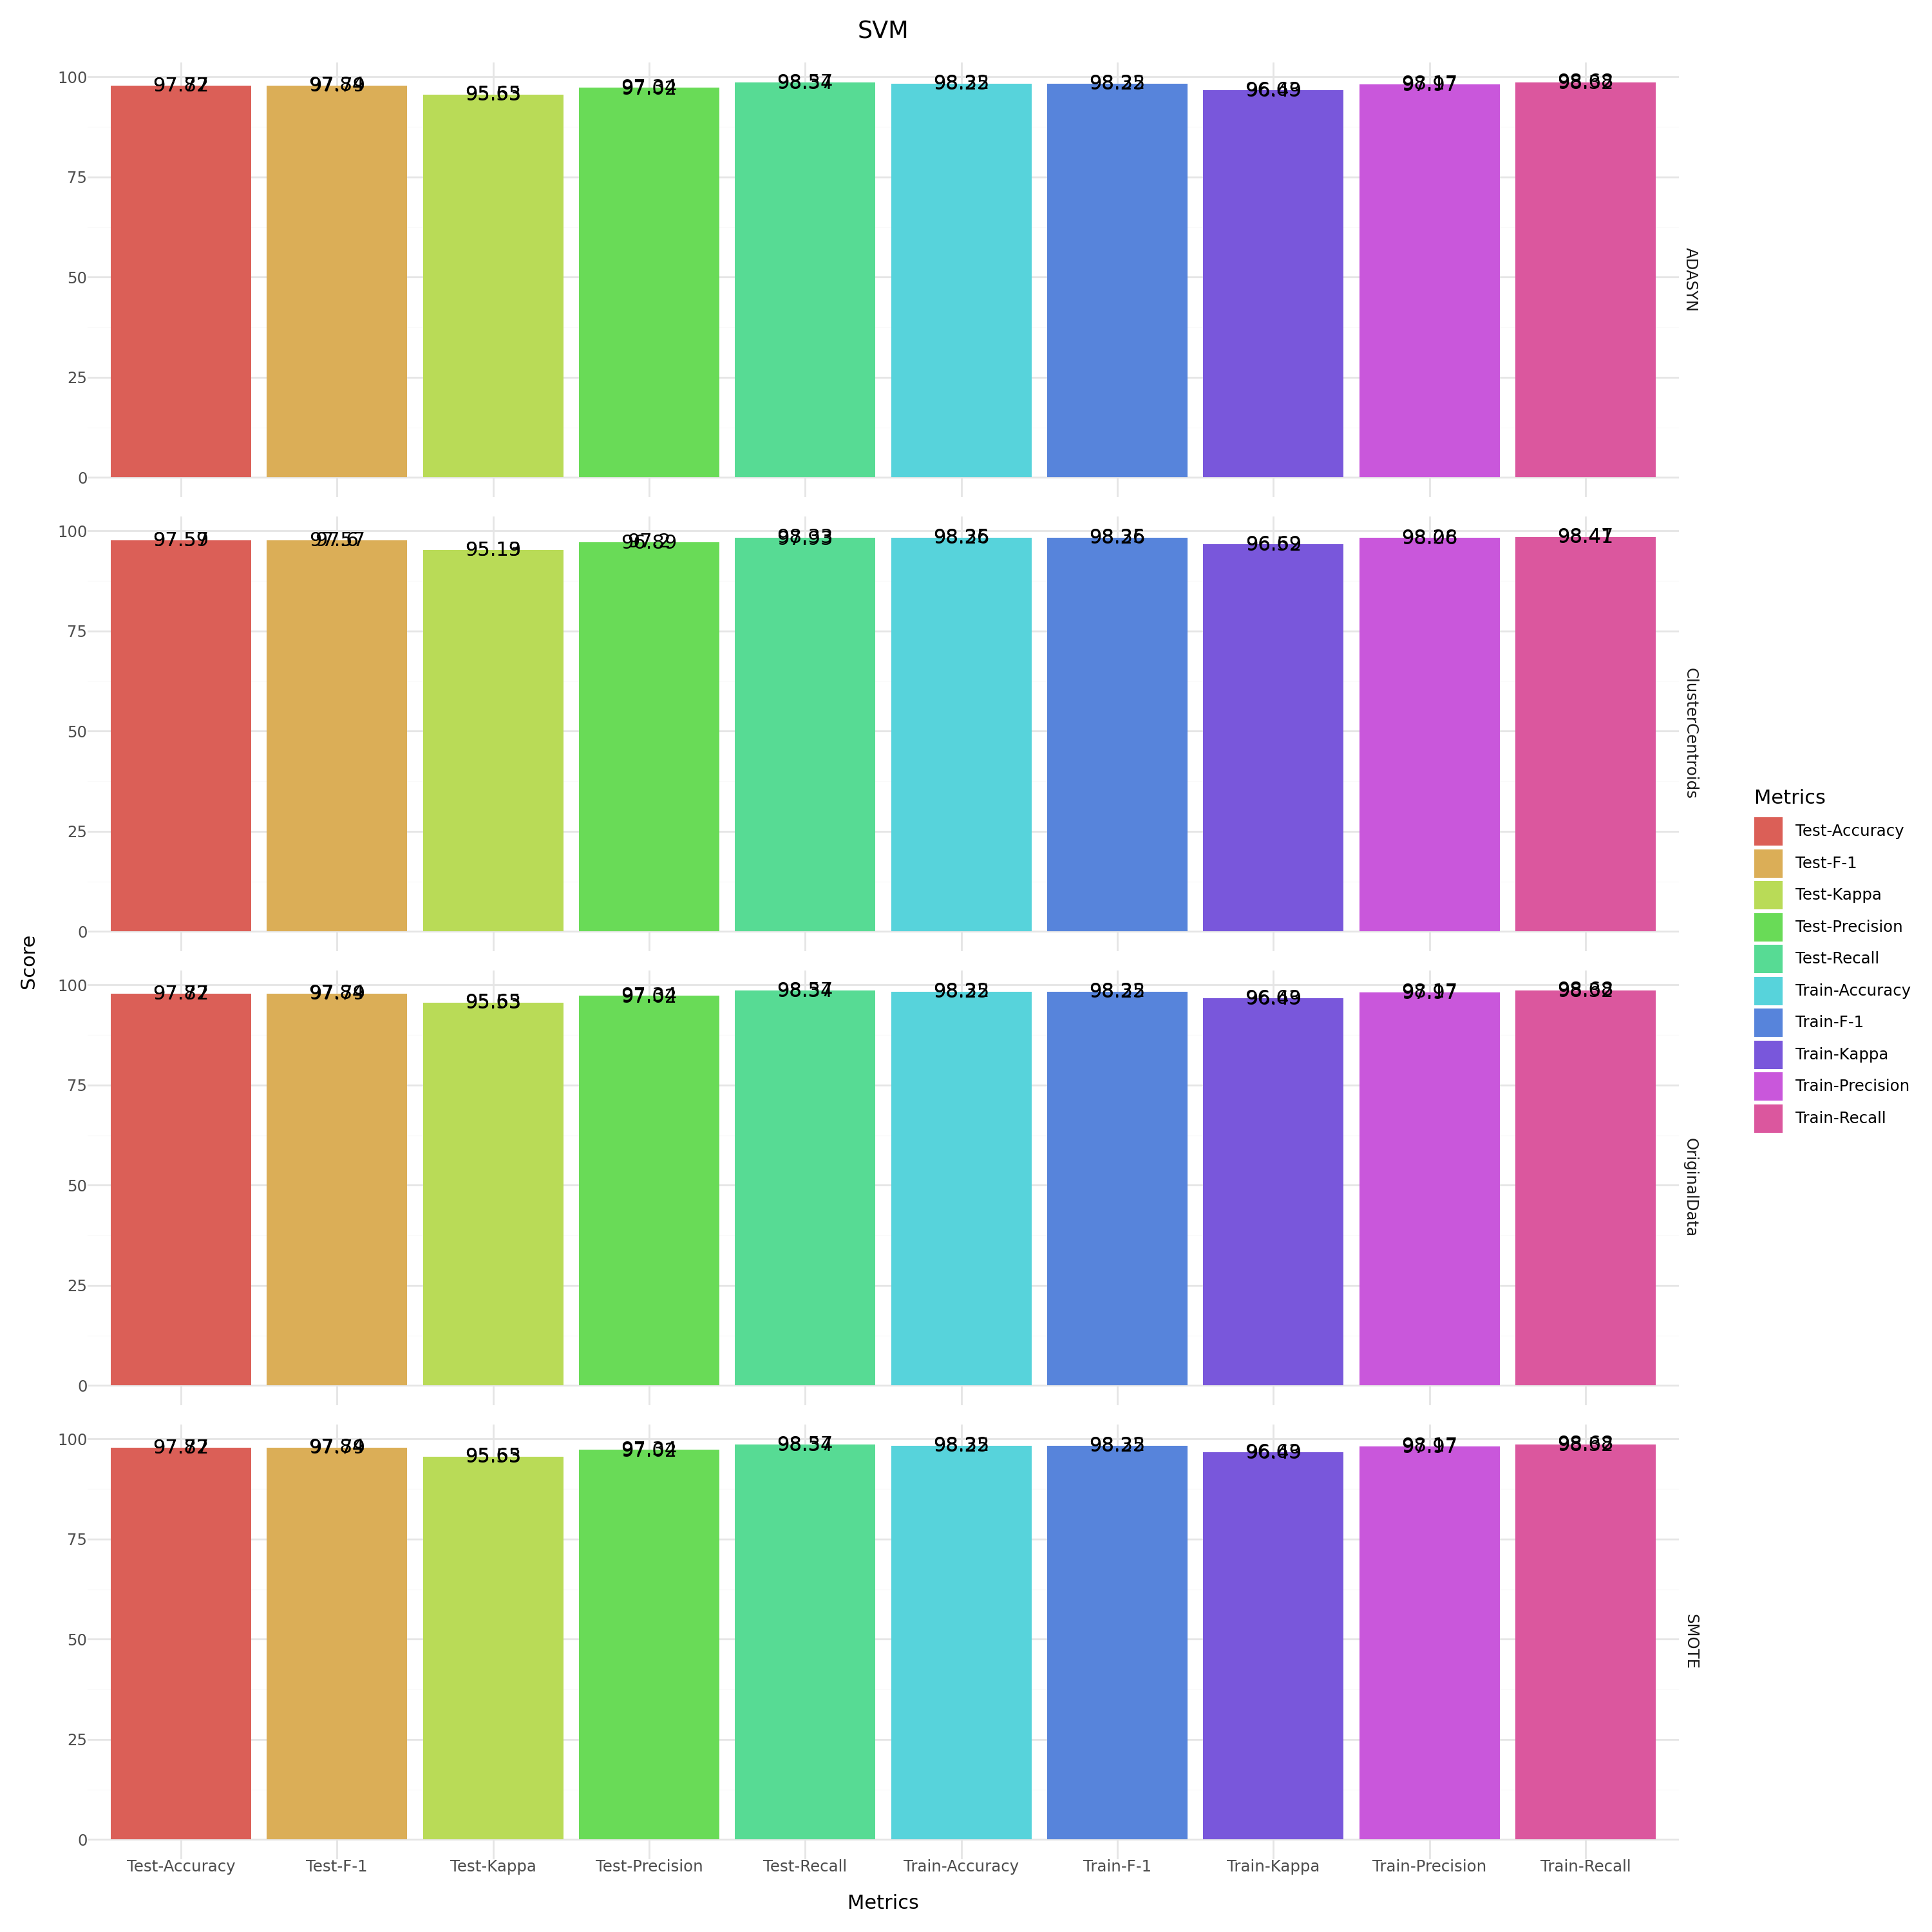

In [52]:
algorithms = df.Algorithm.unique()

for alg in algorithms:

    alg_df = df[df['Algorithm'] == alg]
    

    bar = plt9.ggplot(alg_df, plt9.aes(x='Metrics', y='Score', fill='Metrics',label='Score')) + \
           plt9.facet_grid(rows='Imbalance') + \
           plt9.geom_col(position='dodge') + \
           plt9.theme_minimal() + \
           plt9.theme(figure_size=(15,15)) + \
           plt9.labs(title=alg) + \
           plt9.geom_text(position=plt9.position_dodge(width=.3))
    bar.show()
    print()
    # break

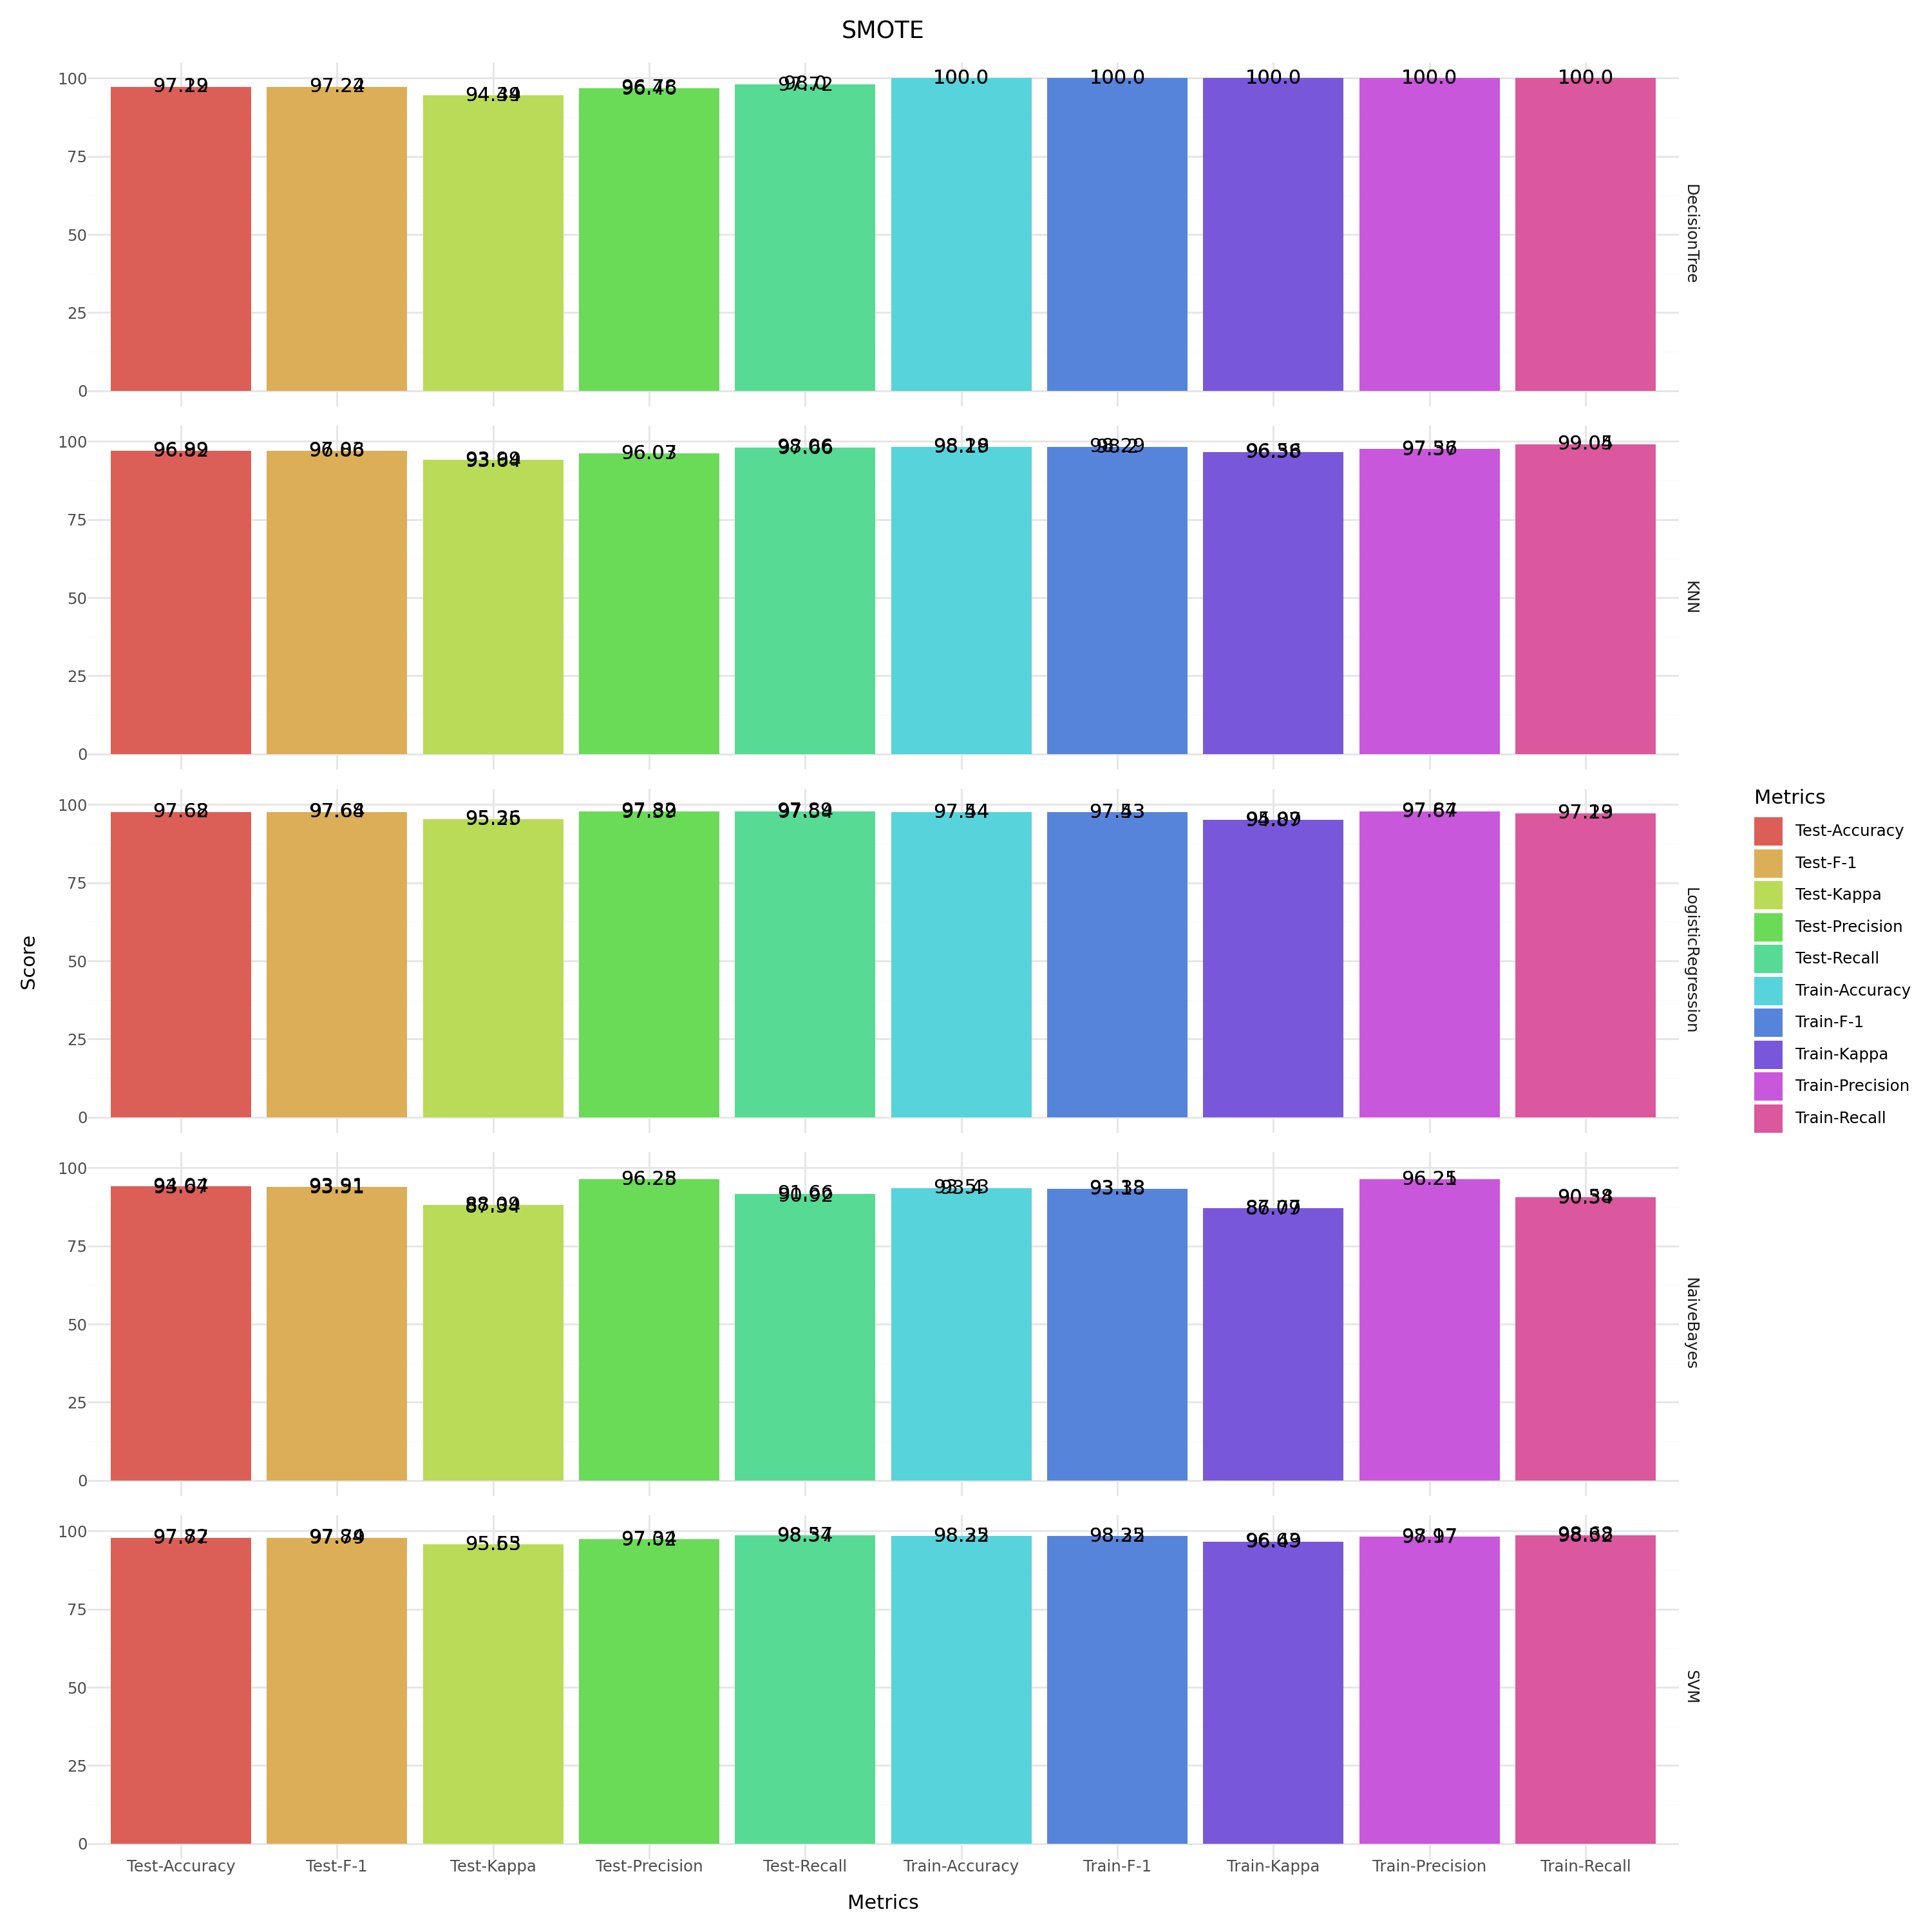

In [57]:
metrics = df.Imbalance.unique()

for met in metrics:

    met_df = df[df['Imbalance'] == met]

    bar = plt9.ggplot(met_df, plt9.aes(x='Metrics', y='Score', fill='Metrics',label='Score')) + \
           plt9.facet_grid(rows='Algorithm') + \
           plt9.geom_col(position='dodge') + \
           plt9.theme_minimal() + \
           plt9.theme(figure_size=(15,15)) + \
           plt9.labs(title=met) + \
           plt9.geom_text(position=plt9.position_dodge(width=.3))
    bar.show()
    print()
    break

In [56]:
met_df

Algorithm          ImputerNum          ImputerCat  \
0   LogisticRegression  SimpleImputer_mean  SimpleImputer_mode   
1         DecisionTree  SimpleImputer_mean  SimpleImputer_mode   
2           NaiveBayes  SimpleImputer_mean  SimpleImputer_mode   
3                  KNN  SimpleImputer_mean  SimpleImputer_mode   
4                  SVM  SimpleImputer_mean  SimpleImputer_mode   
5   LogisticRegression  SimpleImputer_mean  SimpleImputer_mode   
6         DecisionTree  SimpleImputer_mean  SimpleImputer_mode   
7           NaiveBayes  SimpleImputer_mean  SimpleImputer_mode   
8                  KNN  SimpleImputer_mean  SimpleImputer_mode   
9                  SVM  SimpleImputer_mean  SimpleImputer_mode   
10  LogisticRegression  SimpleImputer_mean  SimpleImputer_mode   
11        DecisionTree  SimpleImputer_mean  SimpleImputer_mode   
12          NaiveBayes  SimpleImputer_mean  SimpleImputer_mode   
13                 KNN  SimpleImputer_mean  SimpleImputer_mode   
14                 SVM  SimpleImputer_mean  SimpleImputer_mode   
15  LogisticRegression  SimpleImputer_mean  SimpleImputer_mode   
16        DecisionTree  SimpleImputer_mean  SimpleImputer_mode   
17          NaiveBayes  SimpleImputer_mean  SimpleImputer_mode   
18                 KNN  SimpleImputer_mean  SimpleImputer_mode   
19                 SVM  SimpleImputer_mean  SimpleImputer_mode   
20  LogisticRegression          KNNImptuer  SimpleImputer_mode   
21        DecisionTree          KNNImptuer  SimpleImputer_mode   
22          NaiveBayes          KNNImptuer  SimpleImputer_mode   
23                 KNN          KNNImptuer  SimpleImputer_mode   
24                 SVM          KNNImptuer  SimpleImputer_mode   
25  LogisticRegression          KNNImptuer  SimpleImputer_mode   
26        DecisionTree          KNNImptuer  SimpleImputer_mode   
27          NaiveBayes          KNNImptuer  SimpleImputer_mode   
28                 KNN          KNNImptuer  SimpleImputer_mode   
29                 SVM          KNNImptuer  SimpleImputer_mode   
30  LogisticRegression          KNNImptuer  SimpleImputer_mode   
31        DecisionTree          KNNImptuer  SimpleImputer_mode   
32          NaiveBayes          KNNImptuer  SimpleImputer_mode   
33                 KNN          KNNImptuer  SimpleImputer_mode   
34                 SVM          KNNImptuer  SimpleImputer_mode   
35  LogisticRegression          KNNImptuer  SimpleImputer_mode   
36        DecisionTree          KNNImptuer  SimpleImputer_mode   
37          NaiveBayes          KNNImptuer  SimpleImputer_mode   
38                 KNN          KNNImptuer  SimpleImputer_mode   
39                 SVM          KNNImptuer  SimpleImputer_mode   

           Imbalance    Metrics   Score    Set  
0              SMOTE  Train-F-1   97.53  Train  
1              SMOTE  Train-F-1  100.00  Train  
2              SMOTE  Train-F-1   93.18  Train  
3              SMOTE  Train-F-1   98.20  Train  
4              SMOTE  Train-F-1   98.25  Train  
5             ADASYN  Train-F-1   97.53  Train  
6             ADASYN  Train-F-1  100.00  Train  
7             ADASYN  Train-F-1   93.18  Train  
8             ADASYN  Train-F-1   98.20  Train  
9             ADASYN  Train-F-1   98.25  Train  
10      OriginalData  Train-F-1   97.53  Train  
11      OriginalData  Train-F-1  100.00  Train  
12      OriginalData  Train-F-1   93.18  Train  
13      OriginalData  Train-F-1   98.20  Train  
14      OriginalData  Train-F-1   98.25  Train  
15  ClusterCentroids  Train-F-1   97.65  Train  
16  ClusterCentroids  Train-F-1  100.00  Train  
17  ClusterCentroids  Train-F-1   93.63  Train  
18  ClusterCentroids  Train-F-1   98.25  Train  
19  ClusterCentroids  Train-F-1   98.35  Train  
20             SMOTE  Train-F-1   97.43  Train  
21             SMOTE  Train-F-1  100.00  Train  
22             SMOTE  Train-F-1   93.33  Train  
23             SMOTE  Train-F-1   98.29  Train  
24             SMOTE  Train-F-1   98.32  Train  
25            ADASYN  Train-F-1 